<a href="https://colab.research.google.com/github/magzero0099/credit-risk-analysis-predictive-model/blob/main/IMPAGO_DE_CR%C3%89DITO_AN%C3%81LS_DATOS_ELAB_MOD_PRED_GFDC2DBACH2223.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#CÓDIGO DE *IMPAGO DE PRÉSTAMOS: ANÁLISIS DE DATOS Y ELABORACIÓN DE UN MODELO PREDICTIVO.*

##Por Gonzalo Fdez de Córdoba García.

Este es el programa de Python en el que se ha llevado a cabo el proyecto. Las distintas partes del programa están nombradas por un título y acompañadas de algún que otro comentario. No se pretende que el lector entienda ni el código ni todos los comentarios: **se ha dejado a disposición principalmente para que se pueda entender cómo se ha llevado a cabo el proyecto.**

---

##INSTRUCCIONES

- Si no se dispone del archivo que contiene el conjunto de datos, no se deberá ejecutar el programa

- Si se dispone del archivo que contiene el conjunto de datos, el usuario podrá introducir unos datos bancarios y hacer una predicción con el modelo creado. Para ello, se tendrán que seguir las indicaciones que vayan apareciendo en pantalla.

Aquellas partes del programa enfocadas a la predicción de los datos introducidos por el usuario presentarán títulos **marcados en negro**.

##**PREDICCIÓN DE DATOS INTRODUCIDOS POR EL USUARIO**: ELEGIR SI SE DESEA HACER UNA PREDICCIÓN O NO

Si quiere hacer una predicción, **pulse 1**. Si simplemente quiere observar el programa, **pulse 0**.

In [ ]:
input_p = input('Introduzca 1 si quiere hacer una predicción. \nIntroduzca 0 si no\n: ')


Introduzca 1 si quiere hacer una predicción. 
Introduzca 0 si no
: 0


In [ ]:
str(input_p)


'0'

##LIBRERÍAS

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import describe
import scipy as sp
import statsmodels.api as sm
from IPython.display import clear_output
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn import linear_model
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import ExtraTreesRegressor
import math
from scipy import stats

# No mostrar los warnings
import warnings
warnings.filterwarnings('ignore')



##0. CARGAR FICHERO

ESTILO:

In [ ]:
#No hay muchos recursos en Internet acerca de esto.
# https://github.com/dataprofessor/code/blob/master/python/pandas_styling_dataframe.ipynb

In [ ]:
style = [{'selector': 'th',
  'props': [('background', '#6178A7'),
            ('color', 'white'),
            ('font-family', 'calibri')]},

 {'selector': 'td',
  'props': [('font-family', 'calibri')]},

 {'selector': 'tr:nth-of-type(odd)',
  'props': [('background', '#DCDCDC')]},

 {'selector': 'tr:nth-of-type(even)',
  'props': [('background', 'white')]},

]

In [ ]:
dataset = pd.read_csv('/content/Credit_datasetV2.csv')
dataset.drop('Unnamed: 0', axis = 1, inplace = True)
dataset.head(5).style.format(precision=3).set_table_styles(style)

,income,loan_amount,term_length,install_to_inc,occup,marital,schufa,num_applic,OBS_DATE,target_var
0,18785.517943694504,12300,67.0,0.009772532761805456,nan,Single,7106.014471346445,1,18JUL2018 - 00:00:00,nan
1,12861.495159877606,Not avail.,113.0,0.003509136597401741,Employee,Divorced,7694.806893720367,1,16JUL2018 - 00:00:00,0
2,14886.776341632107,10700,Not avail.,0.013310346283231944,Unemployed,Single,7142.496337537019,1,21DEC2010 - 00:00:00,1
3,Not avail.,33000,112.0,0.004760874885112928,Employee,Single,7446.1706118576485,1,05NOV2015 - 00:00:00,0
4,15897.753806874589,19900,59.0,0.02121608748572823,Unemployed,Separated,7241.656646188094,1,13JUL2015 - 00:00:00,1


##1. EXPLORACIÓN INICIAL

Variables:

Explicación rápida de las variables

In [ ]:
dataset_columns = dataset.columns
columns = pd.DataFrame(dataset_columns)
exp_income = "Ingresos del cliente"
exp_loanam = "Cantidad prestada"
exp_termlen = "Longitud del préstamo"
exp_instinc = "Ratio cuota a ingresos"
exp_occup = "Situación laboral"
exp_marital = "Estado civil"
exp_shuf = "Puntuación externa"
exp_numappl = "Número de solicitantes"
exp_date = "Fecha de solicitud del crédito"
exp_targetvar = "Variable de salida. Si se impagó o no"
exp = [exp_income,exp_loanam, exp_termlen, exp_instinc, exp_occup,  exp_marital, exp_shuf,  exp_numappl,  exp_date,  exp_targetvar]
explanation = pd.DataFrame(exp)
variables = pd.concat([columns, explanation], axis = 1)
variables.columns = ['variables', 'explicación / traducción']
variables.head(10).style.format(precision=3).set_table_styles(style)

,variables,explicación / traducción
0,income,Ingresos del cliente
1,loan_amount,Cantidad prestada
2,term_length,Longitud del préstamo
3,install_to_inc,Ratio cuota a ingresos
4,occup,Situación laboral
5,marital,Estado civil
6,schufa,Puntuación externa
7,num_applic,Número de solicitantes
8,OBS_DATE,Fecha de solicitud del crédito
9,target_var,Variable de salida. Si se impagó o no


Observamos el data type

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   income          9692 non-null   object
 1   loan_amount     9690 non-null   object
 2   term_length     9681 non-null   object
 3   install_to_inc  9703 non-null   object
 4   occup           9688 non-null   object
 5   marital         9707 non-null   object
 6   schufa          9713 non-null   object
 7   num_applic      9689 non-null   object
 8   OBS_DATE        9737 non-null   object
 9   target_var      9732 non-null   object
dtypes: object(10)
memory usage: 781.4+ KB


Será necesaria una transformación de estos a int o float, dependiendo de si la variable es continua o no. También observamos que hay nulls en todas las columnas, por lo que habrá que lidiar también con esto.

In [ ]:
dataset.describe().head(10).style.format(precision=3).set_table_styles(style)

,income,loan_amount,term_length,install_to_inc,occup,marital,schufa,num_applic,OBS_DATE,target_var
count,9692,9690,9681,9703,9688,9707,9713,9689,9737,9732
unique,9373,395,165,9425,7,6,9407,3,3602,3
top,Not avail.,Not avail.,Not avail.,Not avail.,Unemployed,Single,Not avail.,1,Not avail.,0
freq,320,319,254,279,4509,3797,307,6657,302,7982


In [ ]:
dataset_nan = dataset.copy()
for i in dataset_nan.columns:
    dataset_nan[i] = dataset_nan[i].replace(["Not avail."],np.NaN)

dataset_nan.head(5).style.format(precision=3).set_table_styles(style).highlight_null(null_color="red")

,income,loan_amount,term_length,install_to_inc,occup,marital,schufa,num_applic,OBS_DATE,target_var
0,18785.517943694504,12300,67.0,0.009772532761805456,nan,Single,7106.014471346445,1,18JUL2018 - 00:00:00,nan
1,12861.495159877606,nan,113.0,0.003509136597401741,Employee,Divorced,7694.806893720367,1,16JUL2018 - 00:00:00,0
2,14886.776341632107,10700,nan,0.013310346283231944,Unemployed,Single,7142.496337537019,1,21DEC2010 - 00:00:00,1
3,nan,33000,112.0,0.004760874885112928,Employee,Single,7446.1706118576485,1,05NOV2015 - 00:00:00,0
4,15897.753806874589,19900,59.0,0.02121608748572823,Unemployed,Separated,7241.656646188094,1,13JUL2015 - 00:00:00,1


In [ ]:
dataset.isin(['Not avail.']).sum(axis=0) #Not avail es un valor que presentan los datos como "relleno".

income            320
loan_amount       319
term_length       254
install_to_inc    279
occup             281
marital           310
schufa            307
num_applic        292
OBS_DATE          302
target_var        296
dtype: int64

In [ ]:
dataset.isnull().sum() #"null" es dado por numpy, al presentar un valor vacío o indefinido.

income            308
loan_amount       310
term_length       319
install_to_inc    297
occup             312
marital           293
schufa            287
num_applic        311
OBS_DATE          263
target_var        268
dtype: int64

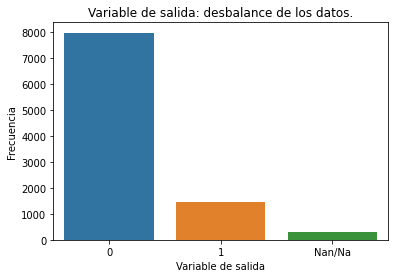

In [ ]:
#Vemos si el dataset está balanceado.
defaults = dataset['target_var']
ax = sns.countplot(defaults)
plt.xticks(ticks = np.arange(0,3), labels = ['0', '1', 'Nan/Na'])
plt.ylabel('Frecuencia')
plt.xlabel('Variable de salida')
plt.title('Variable de salida: desbalance de los datos.')
#defaults.value_counts()
#No lo está.
clear_output()

In [ ]:
#Quitamos aquellas columnas con pd.na (Incluyen los NaNs)
dataset2 = dataset.dropna()
dataset2.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 7405 entries, 1 to 9999
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   income          7405 non-null   object
 1   loan_amount     7405 non-null   object
 2   term_length     7405 non-null   object
 3   install_to_inc  7405 non-null   object
 4   occup           7405 non-null   object
 5   marital         7405 non-null   object
 6   schufa          7405 non-null   object
 7   num_applic      7405 non-null   object
 8   OBS_DATE        7405 non-null   object
 9   target_var      7405 non-null   object
dtypes: object(10)
memory usage: 636.4+ KB


Si quitamos los NaNs, nos quedamos sin una buena parte del dataset (un 25%)

0             6063
1             1116
Not avail.     226
Name: target_var, dtype: int64

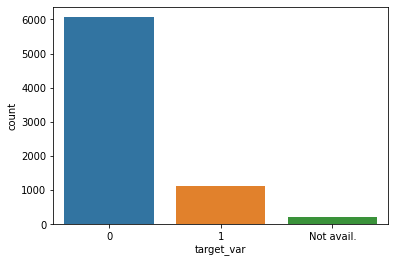

In [ ]:
#Vemos si el dataset2 está balanceado.
defaults = dataset2['target_var']
ax = sns.countplot(defaults)
defaults.value_counts()

In [ ]:
col = dataset2.columns.to_list()

# Nos deshacemos de los "Not avail."
for i in col:
    dataset2 = dataset2[dataset2[i] != "Not avail."]
dataset2.describe()

,income,loan_amount,term_length,install_to_inc,occup,marital,schufa,num_applic,OBS_DATE,target_var
count,5433,5433,5433,5433,5433,5433,5433,5433,5433,5433
unique,5433,381,160,5433,6,5,5433,2,3022,2
top,15897.753806874589,20400,66.0,0.02121608748572823,Unemployed,Single,7241.656646188094,1,07NOV2010 - 00:00:00,0
freq,1,46,85,1,2610,2230,1,3847,7,4598


Es necesario lidiar con los "NaN" y "Not avail", ya que son datos que faltan. Es un dataset pequeño, y elminar los datos nos quita gran parte del dataset. Hay algunos que se pueden intentar inferir, por lo que eso es lo que se hará.

In [ ]:
#Eliminamos aquellos registros que no tienen informada la variable objetivo, ya que son inservibles para el modelo y el estudio.
dataset3 = dataset.copy()

dataset3 = dataset3[~dataset3['target_var'].isnull()] #Nos quedamos con aquellas filas cuya var obj no sea null (Es decir, un valor vacío o un NaN)
                                                      #(Pandas trata a los valores vacíos y a los NaNs de una manera parecida, por lo que .isnull()
                                                      #también engloba a los valores NaN.)

dataset3 = dataset3[dataset3['target_var']!='Not avail.'] #Quitamos aquellas cuya var obj sea "Not avail."
datset_test = dataset.copy()

#Separamos las variables numéricas para cambiar su dtype.
#Primero convertiremos Not avail en NaN (not a number), y
#luego cambiaremos el dtype de las variables numéricas.

col_num = ['income','loan_amount','term_length','install_to_inc','schufa']
col_cat = ['occup','marital','num_applic']

#Sustituimos los "Not avail." por NaN.
for i in col_num:
    dataset3[i] = dataset3[i].replace(["Not avail."],np.NaN)


dataset3 = dataset3.astype({"income": float,
                            "loan_amount": float,
                            "term_length": float,
                            "install_to_inc": float,
                            "schufa": float,
                            "target_var":int
                           })

#target_var se convierte a int ya que no es continua.

#Se sustituyen los los np.NA por Not avail.
dataset3['occup'].fillna('Not avail.',inplace=True)
dataset3['marital'].fillna('Not avail.',inplace=True)
dataset3['num_applic'].fillna('Not avail.',inplace=True)

Tenemos que intentar deshacernos del mínimo número de datos posibles, por lo que, en vez de suprimir aquellas filas que faltan, intentaremos inferir algunas de sus variables.

"loan_amount", "term_length", "income" e "install_to_inc" están relacionadas de la siguiente manera:

install_to_inc = (loan_amount / term_length )/income

In [ ]:
#Como hemos mencionado anteriormente, son demasiados los que eliminariamos, asi que procederemos a inferir parte de los datos
#que faltan. Sabemos que install_to_inc es una variable que esta construida a partir de income, loan_amount y term_length,
#por lo que procederemos a inferir usando arboles de regresión.
#la libreria usada para esto es Iterative imputer Extra Trees Regressor
#https://scikit-learn.org/stable/modules/generated/sklearn.impute.IterativeImputer.html

imp = IterativeImputer(estimator=ExtraTreesRegressor(n_estimators=10),max_iter=10, random_state=0)
imp.fit(dataset3[['income','loan_amount','term_length','install_to_inc']])
imputed = imp.transform(dataset3[['income','loan_amount','term_length','install_to_inc']])

#Creamos dataframe con los datos inferidos.

dataset3_imputed = pd.DataFrame(imputed,columns = ['income','loan_amount',
                                                   'term_length','install_to_inc'])

In [ ]:
dataset3[['income',	'loan_amount',	'term_length',	'install_to_inc']] #datos no imputados

,income,loan_amount,term_length,install_to_inc
1,12861.495160,NaN,113.0,0.003509
2,14886.776342,10700.0,NaN,0.013310
3,NaN,33000.0,112.0,0.004761
4,15897.753807,19900.0,59.0,0.021216
5,30494.619636,28500.0,38.0,0.024595
...,...,...,...,...
9994,52514.911023,25500.0,54.0,0.008992
9995,23743.298598,21900.0,66.0,0.013975
9996,29675.270560,27600.0,35.0,0.026573
9997,33213.332695,16300.0,80.0,0.006135


In [ ]:
dataset3_imputed #datos ya imputados

,income,loan_amount,term_length,install_to_inc
0,12861.495160,7480.0,113.0,0.003509
1,14886.776342,10700.0,56.1,0.013310
2,57229.530143,33000.0,112.0,0.004761
3,15897.753807,19900.0,59.0,0.021216
4,30494.619636,28500.0,38.0,0.024595
...,...,...,...,...
9431,52514.911023,25500.0,54.0,0.008992
9432,23743.298598,21900.0,66.0,0.013975
9433,29675.270560,27600.0,35.0,0.026573
9434,33213.332695,16300.0,80.0,0.006135


In [ ]:
#Rellenamos los datos que faltan introduciendo la fórmula con la cual se calcula el "install_to_inc".
#Guardamos las columnas e índices por si posteriormente se quieren comparar los resultados con los del interative imputer.
nan_list_j = []
nan_list_i = []
dataset_nans = dataset3[['income',	'loan_amount',	'term_length',	'install_to_inc']].copy()
col = dataset_nans.columns
dataset_nans.drop
dataset_nans.reset_index(inplace = True, drop = True)
nans_index = dataset_nans.index
dataset_nans['income'].isnull()
nans = dataset_nans.isnull()


for i in col:
  for j in nans_index:
    if nans[i][j] == True and i == 'income':
      nan_list_j.append(j)
      nan_list_i.append(i)
      #print('a')
      dataset_nans[i][j] = (dataset_nans['loan_amount'][j] / dataset_nans['term_length'][j]) / dataset_nans['install_to_inc'][j]

    if nans[i][j] == True and i == 'loan_amount':
      nan_list_j.append(j)
      nan_list_i.append(i)
      #print('b')
      dataset_nans[i][j] = dataset_nans['install_to_inc'][j] * dataset_nans['income'][j] * dataset_nans['term_length'][j]

    if nans[i][j] == True and i == 'term_length':
      nan_list_j.append(j)
      nan_list_i.append(i)
      #print('c')
      dataset_nans[i][j] = dataset_nans['loan_amount'][j] / (dataset_nans['install_to_inc'][j] * dataset_nans['income'][j])

    if nans[i][j] == True and i == 'install_to_inc':
      nan_list_j.append(j)
      nan_list_i.append(i)
      #print('d')
      dataset_nans[i][j] = (dataset_nans['loan_amount'][j] / dataset_nans['term_length'][j]) / dataset_nans['income'][j]


In [ ]:
#len(nan_list_j)

In [ ]:
dataset_nans

,income,loan_amount,term_length,install_to_inc
0,12861.495160,5100.0,113.0,0.003509
1,14886.776342,10700.0,54.0,0.013310
2,61888.384856,33000.0,112.0,0.004761
3,15897.753807,19900.0,59.0,0.021216
4,30494.619636,28500.0,38.0,0.024595
...,...,...,...,...
9431,52514.911023,25500.0,54.0,0.008992
9432,23743.298598,21900.0,66.0,0.013975
9433,29675.270560,27600.0,35.0,0.026573
9434,33213.332695,16300.0,80.0,0.006135


In [ ]:
nan_list_j = []
dataset_nans.reset_index(inplace = True, drop = True)
nans = dataset_nans.isnull()

for i in col:
  for j in range(len(dataset_nans.index)):
    if nans[i][j] == True and i == 'income':
      nan_list_j.append(j)
      nan_list_i.append(i)
      #print('a')
      dataset_nans[i][j] = dataset3_imputed[i][j]


    if nans[i][j] == True and i == 'loan_amount':
      nan_list_j.append(j)
      nan_list_i.append(i)
      #print('b')
      dataset_nans[i][j] = dataset3_imputed[i][j]


    if nans[i][j] == True and i == 'term_length':
      nan_list_j.append(j)
      nan_list_i.append(i)
      #print('c')
      dataset_nans[i][j] = dataset3_imputed[i][j]


    if nans[i][j] == True and i == 'install_to_inc':
      nan_list_j.append(j)
      nan_list_i.append(i)
      #print('d')
      dataset_nans[i][j] = dataset3_imputed[i][j]



In [ ]:
dataset_nans

,income,loan_amount,term_length,install_to_inc
0,12861.495160,5100.0,113.0,0.003509
1,14886.776342,10700.0,54.0,0.013310
2,61888.384856,33000.0,112.0,0.004761
3,15897.753807,19900.0,59.0,0.021216
4,30494.619636,28500.0,38.0,0.024595
...,...,...,...,...
9431,52514.911023,25500.0,54.0,0.008992
9432,23743.298598,21900.0,66.0,0.013975
9433,29675.270560,27600.0,35.0,0.026573
9434,33213.332695,16300.0,80.0,0.006135


In [ ]:
dataset3_imputed_1 = dataset_nans

In [ ]:
#Juntamos los datos una vez ya inferidos, y eliminamos aquellos datos que no teniamos previamente.
#La pérdida de observaciones es asumible.
dataset3_not_imputed = dataset3.drop(['income','loan_amount','term_length','install_to_inc'], axis =1)
dataset3_not_imputed.reset_index(inplace=True,drop=True)

dataset4 = dataset3_imputed_1.merge(dataset3_not_imputed,left_index=True, right_index=True)
dataset4 = dataset4[~dataset4['schufa'].isnull()]
dataset4 = dataset4[~dataset4['OBS_DATE'].isnull()]
dataset4 = dataset4[dataset4['OBS_DATE'] != 'Not avail.']
dataset4

,income,loan_amount,term_length,install_to_inc,occup,marital,schufa,num_applic,OBS_DATE,target_var
0,12861.495160,5100.0,113.0,0.003509,Employee,Divorced,7694.806894,1,16JUL2018 - 00:00:00,0
1,14886.776342,10700.0,54.0,0.013310,Unemployed,Single,7142.496338,1,21DEC2010 - 00:00:00,1
2,61888.384856,33000.0,112.0,0.004761,Employee,Single,7446.170612,1,05NOV2015 - 00:00:00,0
3,15897.753807,19900.0,59.0,0.021216,Unemployed,Separated,7241.656646,1,13JUL2015 - 00:00:00,1
4,30494.619636,28500.0,38.0,0.024595,Unemployed,Divorced,6566.899667,1,25JAN2016 - 00:00:00,1
...,...,...,...,...,...,...,...,...,...,...
9430,13159.390503,10100.0,50.0,0.015350,Unemployed,Single,8689.654573,1,02DEC2016 - 00:00:00,1
9431,52514.911023,25500.0,54.0,0.008992,Unemployed,Married,8212.031222,2,02JAN2010 - 00:00:00,0
9432,23743.298598,21900.0,66.0,0.013975,Unemployed,Single,9703.314402,1,23NOV2016 - 00:00:00,0
9433,29675.270560,27600.0,35.0,0.026573,Unemployed,Divorced,9669.092140,1,19DEC2010 - 00:00:00,0


In [ ]:
dataset5 = dataset4.copy()
dataset5.describe()


,income,loan_amount,term_length,install_to_inc,schufa,target_var
count,8382.000000,8382.000000,8382.000000,8382.000000,8382.000000,8382.000000
mean,27236.863932,20523.962658,65.207456,0.020908,8800.975197,0.153543
std,12627.145673,7451.741917,30.546515,0.024447,2030.408968,0.360532
min,5021.691061,5100.000000,12.000000,0.000729,6000.156943,0.000000
25%,17627.947804,15100.000000,41.000000,0.007369,7241.877435,0.000000
50%,26157.884298,20300.000000,63.000000,0.012833,8393.749374,0.000000
75%,35385.686494,25500.000000,86.000000,0.024595,9872.697520,0.000000
max,81215.721992,50300.000000,214.000000,0.394223,14843.617741,1.000000


In [ ]:
#Convertimos las fechas para poder manejarlas mejor más adelante.
#Creamos una función que le asigna valores numéricos a los meses y deja la fecha más limpia y ordenada.

def date_tr(date_in):
    month_in = date_in[2:5] #letras del lugar 2 al 5 (Se empieza por 0)

    month = 0
    if month_in == 'JAN':
        month = '01'
    elif month_in == 'FEB':
        month = '02'
    elif month_in == 'MAR':
        month = '03'
    elif month_in == 'APR':
        month = '04'
    elif month_in == 'MAY':
        month = '05'
    elif month_in == 'JUN':
        month = '06'
    elif month_in == 'JUL':
        month = '07'
    elif month_in == 'AUG':
        month = '08'
    elif month_in == 'SEP':
        month = '09'
    elif month_in == 'OCT':
        month = '10'
    elif month_in == 'NOV':
        month = '11'
    elif month_in == 'DEC':
        month = '12'
    else:
        month='00'
    #return date_in[:2] + month + date_in[5:]
    return date_in[5:] + '-' + month + '-' + date_in[:2]

In [ ]:
dataset5['date'] = dataset5['OBS_DATE'].str[:9] #Borramos la hora de la fecha.
dataset5['date2'] = dataset5.apply(lambda x : date_tr(x['date']), axis = 1) #aplicamos la función previamente creada con una función lambda.

dataset5.drop(['OBS_DATE','date'],axis=1, inplace=True)
dataset5.rename(columns={"date2": "date"},inplace=True)


In [ ]:
dataset5

,income,loan_amount,term_length,install_to_inc,occup,marital,schufa,num_applic,target_var,date
0,12861.495160,5100.0,113.0,0.003509,Employee,Divorced,7694.806894,1,0,2018-07-16
1,14886.776342,10700.0,54.0,0.013310,Unemployed,Single,7142.496338,1,1,2010-12-21
2,61888.384856,33000.0,112.0,0.004761,Employee,Single,7446.170612,1,0,2015-11-05
3,15897.753807,19900.0,59.0,0.021216,Unemployed,Separated,7241.656646,1,1,2015-07-13
4,30494.619636,28500.0,38.0,0.024595,Unemployed,Divorced,6566.899667,1,1,2016-01-25
...,...,...,...,...,...,...,...,...,...,...
9430,13159.390503,10100.0,50.0,0.015350,Unemployed,Single,8689.654573,1,1,2016-12-02
9431,52514.911023,25500.0,54.0,0.008992,Unemployed,Married,8212.031222,2,0,2010-01-02
9432,23743.298598,21900.0,66.0,0.013975,Unemployed,Single,9703.314402,1,0,2016-11-23
9433,29675.270560,27600.0,35.0,0.026573,Unemployed,Divorced,9669.092140,1,0,2010-12-19


In [ ]:

#Cambiamos el formato.
dataset5['date'] = pd.to_datetime(dataset5['date'], format="%Y-%m-%d") #https://pandas.pydata.org/docs/reference/api/pandas.to_datetime.html

#Transformación date 2. Esta nos servirá para acceder a los datos por meses.
#dataset5 = dataset5.copy()
dataset5['year'] = dataset5['date'].dt.year
dataset5['month'] = dataset5['date'].dt.month
dataset5['day'] = 1
dataset5['date2'] = pd.to_datetime(dataset5[['year', 'month','day']])
dataset5.drop(['year', 'month','day'],axis=1, inplace=True)





#Transformación date 3. esta nos servirá para acceder a los datos por años.
#dataset5 = dataset5.copy()
dataset5['year'] = dataset5['date'].dt.year
dataset5['month'] = 1
dataset5['day'] = 1
dataset5['date3'] = pd.to_datetime(dataset5[['year', 'month','day']])
dataset5.drop(['year', 'month','day'],axis=1, inplace=True)

#varaible clente añadida para más adelante.
dataset5['customer']=1

In [ ]:
total_number = dataset5.describe().transpose()['count'][0]


In [ ]:
#Dividimos los datos en función de la fecha.
#data_test = dataset5[dataset5['date'] >= '2016-01-01']
#data_train = dataset5[dataset5['date'] < '2016-01-01']

In [ ]:
#default_d5 = dataset5[dataset5['target_var']==1]
#nodefault_d5 = dataset5[dataset5['target_var']==0]

##**PREDICCIÓN DE DATOS INTRODUCIDOS POR EL USUARIO**: INTRODUCIR LOS DATOS.

In [ ]:
#Introducción de datos para predicción por el usuario.
if input_p == '1':

  print('INTRODUZCA SUS DATOS')

  schufa_p = float(input('Puntuación schufa: '))
  income_p = float(input('Ingresos: '))
  i_to_inc_p = 0
  t_length_p = float(input('Longitud del préstamo: '))
  l_amount_p = float(input('Cantidad prestada: '))
  print('ESCRIBA EL DÍGITO QUE SE CORRESPONDA A LA OPCIÓN DESEADA')
  occup_p = str(input('Situación laboral (1 = Desempleado, 2 = Estudiando, 3 = Empleado): '))
  marital_p = str(input('Estado civil (1 = Soltero, 2 = Divorciado, 3 = Separado, 4 = Casado, 5 = Conviviendo): '))
  n_applic_p = str(input('Número de solicitantes (1 = 1 o 0 = 2): '))

  i_to_inc_p = (((l_amount_p)/(t_length_p))/(income_p))

  if marital_p == '1':
    marital_p = 'Single'
  if marital_p == '2':
    marital_p  = 'Divorced'
  if marital_p  == '3':
    marital_p  = 'Separated'
  if marital_p  == '4':
    marital_p  = 'Married'
  if marital_p  == '5':
    marital_p  = 'Living together'

  if occup_p == '1':
    occup_p = 'Unemployed'
  if occup_p == '2':
    occup_p = 'Student'
  if occup_p == '3':
    occup_p = 'Employee'

  if n_applic_p == '1':
    n_applic_p = '1'
  if n_applic_p == '0':
    n_applic_p = '2'



  p_list = [income_p, l_amount_p, t_length_p, i_to_inc_p, occup_p, marital_p, schufa_p, n_applic_p, ]
  predic = pd.DataFrame(p_list).transpose()
  predic.columns = ['income', 'loan_amount',	'term_length',	'install_to_inc',	'occup',	'marital',	'schufa',	'num_applic']

In [ ]:
#Separación de los datos sin manetner proporción de 1 y 0. No se usa.
from sklearn.model_selection import train_test_split

#x_train, x_test, y_train, y_test = train_test_split(features, target_var, test_size=0.3)
data_train, data_test = train_test_split(dataset5, test_size=0.3)

In [ ]:
default = dataset5[dataset5['target_var']==1]
notdefault = dataset5[dataset5['target_var']==0]


In [ ]:
#Separación de los datos manteniendo proporción de 0 y 1.
from sklearn.model_selection import train_test_split

#x_train, x_test, y_train, y_test = train_test_split(features, target_var, test_size=0.3)
default_train, default_test = train_test_split(default, test_size=0.29, random_state = 42)
notdefault_train, notdefault_test = train_test_split(notdefault, test_size=0.3, random_state = 42)


In [ ]:
data_train = pd.concat([default_train, notdefault_train], axis = 0)
data_test = pd.concat([default_test, notdefault_test], axis = 0)

In [ ]:
data_test_last = data_test.iloc[2502:2503]

In [ ]:
if input_p == '1':

  p_sust = data_test.reset_index(drop = True).iloc[2502:2503]

  predic_else = p_sust[['target_var',	'date',	'date2',	'date3',	'customer']].reset_index(drop = True)
  predic_ = pd.concat([predic, predic_else], axis = 1)
  predic_ = predic_.astype({"income": float,
                            "loan_amount": float,
                            "term_length": float,
                            "install_to_inc": float,
                            "schufa": float,
                            "target_var":int
                           })
  data_test.iloc[2502:2503] = predic_


## 2. EXPLORACIÓN DE LOS DATOS

Esta parte no se ha acabado utilizando. Debido a la longitud del proyecto, se ha quedado fuera.

In [ ]:
data_total = pd.concat([data_train, data_test], axis = 0)
data_total.reset_index(drop = True)
clear_output()

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f4a6c22beb0>,
      dtype=object)

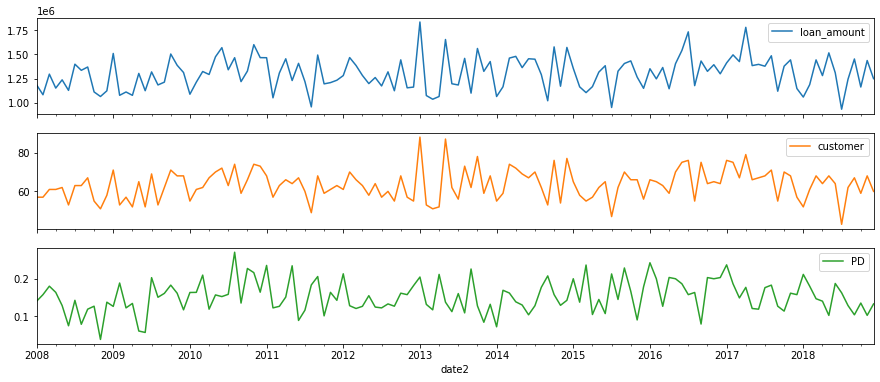

In [ ]:
#Exploración por meses.
data_total_exp = data_total.groupby(['date2']).sum() #Agrupamos for meses y obtenemos el valor total de las variables de las transacciones de cada mes.
data_total_exp['PD'] = data_total_exp['target_var']/data_total_exp['customer'] #Probabilidad de impago.
data_total_exp.drop(['income','term_length', 'install_to_inc','schufa', 'target_var'],axis=1, inplace=True)



data_total_exp.plot(subplots=True, figsize=(15,6))

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f4a6c203070>,
      dtype=object)

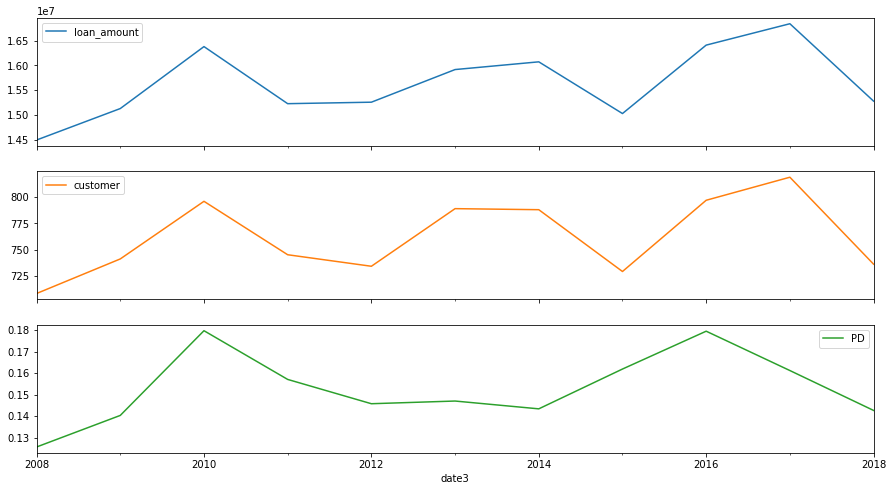

In [ ]:
#Exploración por años.
data_total = pd.concat([data_train, data_test], axis = 0)
data_total.reset_index(drop = True)
data_total_exp = data_total.groupby(['date3']).sum()
data_total_exp['PD'] = data_total_exp['target_var']/data_total_exp['customer'] #Probabilidad de impago.
data_total_exp.drop(['income','term_length', 'install_to_inc','schufa', 'target_var'],axis=1, inplace=True)



data_total_exp.plot(subplots=True, figsize=(15,8))

In [ ]:
anual_pd_mean = data_total_exp['PD'].sum()/len(data_total_exp['PD'].index)

###COEFICIENTE EN FUNCIÓN DE PD DEL AÑO.

No se ha acabado utilizando.

In [ ]:
data_coeff = data_total.copy()
data_coeff['pd_coeff'] = data_coeff['income']

In [ ]:
str(dataset5['date3'][0])

'2018-01-01 00:00:00'

In [ ]:

for j in data_coeff.index:

    #print(j)

    if str(data_coeff['date3'][j]) == '2018-01-01 00:00:00':
      data_coeff['pd_coeff'][j] = data_total_exp['PD']['2018-01-01']

    elif str(data_coeff['date3'][j]) == '2017-01-01 00:00:00':
      data_coeff['pd_coeff'][j] = data_total_exp['PD']['2017-01-01']

    elif str(data_coeff['date3'][j]) == '2016-01-01 00:00:00':
      data_coeff['pd_coeff'][j] = data_total_exp['PD']['2016-01-01']

    elif str(data_coeff['date3'][j]) == '2015-01-01 00:00:00':
      data_coeff['pd_coeff'][j] = data_total_exp['PD']['2015-01-01']

    elif str(data_coeff['date3'][j]) == '2014-01-01 00:00:00':
      data_coeff['pd_coeff'][j] = data_total_exp['PD']['2014-01-01']

    elif str(data_coeff['date3'][j]) == '2013-01-01 00:00:00':
      data_coeff['pd_coeff'][j] = data_total_exp['PD']['2013-01-01']

    elif str(data_coeff['date3'][j]) == '2012-01-01 00:00:00':
      data_coeff['pd_coeff'][j] = data_total_exp['PD']['2012-01-01']

    elif str(data_coeff['date3'][j]) == '2011-01-01 00:00:00':
      data_coeff['pd_coeff'][j] = data_total_exp['PD']['2011-01-01']

    elif str(data_coeff['date3'][j]) == '2010-01-01 00:00:00':
      data_coeff['pd_coeff'][j] = data_total_exp['PD']['2010-01-01']

    elif str(data_coeff['date3'][j]) == '2009-01-01 00:00:00':
      data_coeff['pd_coeff'][j] = data_total_exp['PD']['2009-01-01']

    elif str(data_coeff['date3'][j]) == '2008-01-01 00:00:00':
      data_coeff['pd_coeff'][j] = data_total_exp['PD']['2008-01-01']


In [ ]:
data_coeff

,income,loan_amount,term_length,install_to_inc,occup,marital,schufa,num_applic,target_var,date,date2,date3,customer,pd_coeff
5128,27566.034908,22100.0,44.0,0.018221,Unemployed,Single,8319.004646,1,1,2018-05-15,2018-05-01,2018-01-01,1,0.142663
5653,21582.132769,21400.0,37.0,0.026799,Unemployed,Single,8053.211711,1,1,2011-04-04,2011-04-01,2011-01-01,1,0.157047
6319,5768.745417,15700.0,47.0,0.057906,Unemployed,Single,6951.266384,1,1,2013-01-26,2013-01-01,2013-01-01,1,0.147022
3044,25482.670342,10500.0,55.0,0.007492,Unemployed,Living together,8480.132213,Not avail.,1,2013-09-03,2013-09-01,2013-01-01,1,0.147022
6317,5049.371296,16600.0,36.0,0.091320,Not avail.,Divorced,9094.400199,1,1,2008-09-11,2008-09-01,2008-01-01,1,0.125706
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5260,22088.912515,20000.0,28.1,0.030890,Unemployed,Single,8291.557541,1,0,2017-09-24,2017-09-01,2017-01-01,1,0.161172
3752,19009.514606,16700.0,81.0,0.010846,Employee,Single,10464.204745,1,0,2018-08-02,2018-08-01,2018-01-01,1,0.142663
7445,37124.636593,17500.0,77.0,0.006122,Unemployed,Married,6924.154247,2,0,2008-12-19,2008-12-01,2008-01-01,1,0.125706
979,38482.942470,27400.0,51.0,0.013961,Unemployed,Divorced,8787.656854,1,0,2014-01-13,2014-01-01,2014-01-01,1,0.143401


In [ ]:
#Dividimos los datos en función de la fecha.
#data_test = data_coeff[data_coeff['date3'] >= '2016-01-01']
#data_train = data_coeff[data_coeff['date3'] < '2016-01-01']

## 2.1 VARIABLES CATEGÓRICAS

### 2.1.0 FUNCIÓN ANÁLISIS DE EJES USANDO CONTRASTE DE HIPÓTESIS USANDO APROXIMACIÓN DE LAPLACE.

In [ ]:
def analisis_ejes(df,eje,total,defaults):
    #1.Captura ejes basicos que se usaran para analisis ejes
    ejes = []
    ejes.append(eje)
    ejes.append(total)
    ejes.append(defaults)

    #eje =eje
    #total = customer
    #defaults = target_var


    #2.Filtramos unicamente los valores necesarios
    analisis_ejes  = df.filter(ejes)

    #3.Agrupamos ejes con la suma de buenos y malos
    analisis_ejes_aux = analisis_ejes.groupby(by=eje).sum()

    #4.Obtenemos la PD para cada "fila"-"eje"
    analisis_ejes_aux['PD'] = analisis_ejes_aux[defaults]/analisis_ejes_aux[total]

    #5. Reseteamos indice
    analisis_ejes_aux.reset_index(inplace=True)

    #6.Ordenamos
    analisis_ejes_aux.sort_values(by=['PD'],inplace =True) # .sort_values() ordena según el valor de la variable indicada. Por defecto, de manera descendente.

    #7.Obtenemos una tabla auxiliar desplazada una fila
    analisis_ejes_aux2 = analisis_ejes_aux.shift()  #por default, .shift() "mueve" los datos del df x periodos hacia abajo (1 en este caso), para añadir a "Employed"

    #8.Renombramos las columnas de la tabla auxiliar que usaremos para el contraste de proporciones. Es decir, creamos las columnas del segundo eje.
    aux_column = []
    for i in range(len(analisis_ejes_aux2.columns)):
        aux_column.append(analisis_ejes_aux2.columns[i] + '-1')

    analisis_ejes_aux2.columns = aux_column #

    # 9. Concatenamos las tabla, de forma que tenemos una con las columnas originales y otras desplazada una fila. así podremos comparar cada ocupación con aquella cuyo pd sea más similar.
    analisis_ejes_aux3 = pd.concat([analisis_ejes_aux, analisis_ejes_aux2], axis=1)

    # 10. Filtramos aquellos valores que no tienen datos en PD-1 (Quitamos la fila que sobra)
    analisis_ejes_aux4 = analisis_ejes_aux3.dropna()

    # 11. Calculo estadistico Z (Comparación promedios de dos muestras independientes)
    analisis_ejes_aux4['Z'] = (analisis_ejes_aux4['PD']- analisis_ejes_aux4['PD-1'])/np.sqrt(((analisis_ejes_aux4[defaults] + analisis_ejes_aux4[defaults+'-1'])/
                                       (analisis_ejes_aux4[total] + analisis_ejes_aux4[total+'-1']))*
                                       (1-(analisis_ejes_aux4[defaults] + analisis_ejes_aux4[defaults+'-1'])/
                                       (analisis_ejes_aux4[total] + analisis_ejes_aux4[total+'-1']))*
                                       (1/analisis_ejes_aux4[total]+1/analisis_ejes_aux4[total+'-1']))

    analisis_ejes_aux4['pvalor'] = sp.stats.norm.sf(abs(analisis_ejes_aux4['Z']))*2 #twosided. Alpha se divide entre ambas colas.
    analisis_ejes_aux4['pvalor'] = round(analisis_ejes_aux4['pvalor'], 4)

    return analisis_ejes_aux4

### EXPLIACIÓN ESTADÍSTICO Z:




-total = customer //
-defaults = target_var




-total = 'n' (número de clientes total) // -defaults = suma de target variable (número de defaults) o 'nd'

Estamos intentando averiguar si las diferencias entre dos poblaciones, basándonos en la probabilidad de imapgo de estas, son estadísticamente significativas.
Hipótesis nula (Ho):  Población 1 = Población 2.
 // Hipótesis contraria (H1):  Población 1 != Población 2.




En este caso es un "two proportions z test"

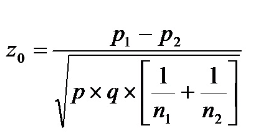



Donde:

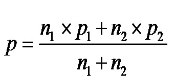

p = probabilidad de default (de 1 a 0) de ambos

q = 1 - p

En nuestro caso utilizamos directamente el número de defaults, por lo que: n * p = nd

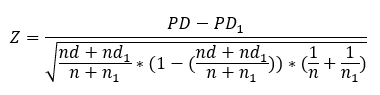

### 2.1.1 OCUPACIÓN

In [ ]:
#Creamos dataframe de data_occup y añadimos variable "PD".
data_occup = data_train[['occup','loan_amount','target_var','customer']]
data_occup = data_occup.groupby(by =['occup']).sum()
data_occup['PD'] = data_occup['target_var']/data_occup['customer']
data_occup.sort_values(by=['PD']).style.format(precision=3).set_table_styles(style)


,loan_amount,target_var,customer,PD
occup,,,,
Employee,32919205.000,32,1614,0.020
2,1268100.000,7,63,0.111
1,1311600.000,8,62,0.129
Student,21855350.000,140,1067,0.131
Not avail.,6966630.000,66,358,0.184
Unemployed,54655800.000,647,2663,0.243
3,1056780.000,13,52,0.250


In [ ]:
data_occup['eje'] = data_occup.index

data_occup = analisis_ejes(data_occup, 'eje','customer','target_var')
data_occup.head(10).style.format(precision=3).set_table_styles(style)

,eje,customer,target_var,PD,eje-1,customer-1,target_var-1,PD-1,Z,pvalor
1,2,63,7,0.111,Employee,1614.000,32.000,0.020,4.716,0.000
0,1,62,8,0.129,2,63.000,7.000,0.111,0.308,0.758
5,Student,1067,140,0.131,1,62.000,8.000,0.129,0.049,0.961
4,Not avail.,358,66,0.184,Student,1067.000,140.000,0.131,2.474,0.013
6,Unemployed,2663,647,0.243,Not avail.,358.000,66.000,0.184,2.452,0.014
2,3,52,13,0.250,Unemployed,2663.000,647.000,0.243,0.117,0.907


In [ ]:
##data_occup = data_train[['occup','loan_amount','target_var','customer']].copy()

##data_occup['occup'] = data_occup['occup'].apply(lambda x: 'Not avail.' if (x == 'Not avail.' or x == '1')
    ##                                            else x)
##data_occup['occup'] = data_occup['occup'].apply(lambda x: 'Student' if (x == 'Student' or x == '2')
      ##                                          else x)
##data_occup['occup'] = data_occup['occup'].apply(lambda x: 'Unemployed' if (x == 'Unemployed' or x == '3')
        ##                                        else x)
#clear_output()
##data_occup = data_occup.groupby(by =['occup']).sum()
##data_occup['PD'] = data_occup['target_var']/data_occup['customer']
#data_occup['eje'] = data_occup.index
##data_occup.sort_values(by=['PD'])

##data_occup['eje'] = data_occup.index

##data_occup = analisis_ejes(data_occup, 'eje','customer','target_var')

##clear_output(wait=True)
##data_occup


In [ ]:

data_occup = data_train[['occup','loan_amount','target_var','customer']]
data_occup['occup'] = data_occup['occup'].apply(lambda x: 'Student' if (x == '2' or x == 'Student')
                                                else x)
data_occup['occup'] = data_occup['occup'].apply(lambda x: 'Student' if (x == '1' or x == 'Not avail.' or x == 'Student')
                                                else x)

data_occup['occup'] = data_occup['occup'].apply(lambda x: 'Unemployed' if (x == '3' or x == 'Unemployed')
                                                else x)

data_occup = data_occup.groupby(by =['occup']).sum()
data_occup['PD'] = data_occup['target_var']/data_occup['customer']
#data_occup['eje'] = data_occup.index
data_occup.sort_values(by=['PD'])

data_occup['eje'] = data_occup.index

data_occup = analisis_ejes(data_occup, 'eje','customer','target_var')

clear_output(wait=True)
data_occup.head(10).style.format(precision=3).set_table_styles(style)

,eje,customer,target_var,PD,eje-1,customer-1,target_var-1,PD-1,Z,pvalor
1,Student,1550,221,0.143,Employee,1614.000,32.000,0.020,12.726,0.000
2,Unemployed,2715,660,0.243,Student,1550.000,221.000,0.143,7.799,0.000


In [ ]:
#Agrupamos algunos segmentos. Mantendremos la variable occup y crearemos una nueva
#occup_agg para observar si, cuando vayamos a seleccionar las mejores caracteristicas del modelo, este agregado se comporta
#mejor o peor.

data_train['occup_agg'] = data_train['occup'].apply(lambda x: 'Student' if (x == '2' or x == 'Student')
                                                    else x)
data_train['occup_agg'] = data_train['occup_agg'].apply(lambda x: 'Student' if (x == '1' or x == 'Not avail.' or x == 'Student')
                                                        else x)

data_train['occup_agg'] = data_train['occup_agg'].apply(lambda x: 'Unemployed' if (x == '3' or x == 'Unemployed')
                                                        else x)


data_test['occup_agg'] = data_test['occup'].apply(lambda x: 'Student' if (x == '2' or x == 'Student')
                                                  else x)
data_test['occup_agg'] = data_test['occup_agg'].apply(lambda x: 'Student' if (x == '1' or x == 'Not avail.' or x == 'Student')
                                                      else x)

data_test['occup_agg'] = data_test['occup_agg'].apply(lambda x: 'Unemployed' if (x == '3' or x == 'Unemployed')
                                                      else x)

#data_train.head()

In [ ]:
data_occup_agg = data_train[['occup_agg','loan_amount','target_var','customer']]
data_occup_agg = data_occup_agg.groupby(by =['occup_agg']).sum()
data_occup_agg['PD'] = data_occup_agg['target_var']/data_occup_agg['customer']
data_occup_agg.sort_values(by=['PD']).head(10).style.format(precision=3).set_table_styles(style)

,loan_amount,target_var,customer,PD
occup_agg,,,,
Employee,32919205.000,32,1614,0.020
Student,31401680.000,221,1550,0.143
Unemployed,55712580.000,660,2715,0.243


### 2.1.2 ESTADO CIVIL

In [ ]:
data_marital = data_train[['marital','loan_amount','target_var','customer']]
data_marital = data_marital.groupby(by =['marital']).sum()
data_marital['PD'] = data_marital['target_var']/data_marital['customer']
data_marital.sort_values(by=['PD']).head(10).style.format(precision=3).set_table_styles(style)


,loan_amount,target_var,customer,PD
marital,,,,
Married,15760140.000,22,784,0.028
Living together,16457090.000,88,801,0.110
Not avail.,7265550.000,47,354,0.133
Single,46289005.000,407,2273,0.179
Divorced,17058060.000,167,825,0.202
Separated,17203620.000,182,842,0.216


In [ ]:
data_marital['eje'] = data_marital.index
data_marital = analisis_ejes(data_marital, 'eje', 'customer', 'target_var')
data_marital.head(10).style.format(precision=3).set_table_styles(style)

,eje,customer,target_var,PD,eje-1,customer-1,target_var-1,PD-1,Z,pvalor
1,Living together,801,88,0.110,Married,784.000,22.000,0.028,6.407,0.000
3,Not avail.,354,47,0.133,Living together,801.000,88.000,0.110,1.117,0.264
5,Single,2273,407,0.179,Not avail.,354.000,47.000,0.133,2.143,0.032
0,Divorced,825,167,0.202,Single,2273.000,407.000,0.179,1.480,0.139
4,Separated,842,182,0.216,Divorced,825.000,167.000,0.202,0.689,0.491


In [ ]:
data_marital = data_train[['marital','loan_amount','target_var','customer']]

data_marital['marital'] = data_marital['marital'].apply(lambda x: 'Single' if (x=='Not avail.')
                                                          else x)
data_marital['marital'] = data_marital['marital'].apply(lambda x: 'Divorced_sep' if (x=='Divorced' or x=='Separated'	)
                                                          else x)

data_marital = data_marital.groupby(by =['marital']).sum()
data_marital['PD'] = data_marital['target_var']/data_marital['customer']

data_marital.sort_values(by=['PD'])

data_marital['eje'] = data_marital.index

data_marital = analisis_ejes(data_marital, 'eje','customer','target_var')

clear_output(wait=True)
data_marital.head(10).style.format(precision=3).set_table_styles(style)

,eje,customer,target_var,PD,eje-1,customer-1,target_var-1,PD-1,Z,pvalor
1,Living together,801,88,0.110,Married,784.000,22.000,0.028,6.407,0.000
3,Single,2627,454,0.173,Living together,801.000,88.000,0.110,4.275,0.000
0,Divorced_sep,1667,349,0.209,Single,2627.000,454.000,0.173,2.992,0.003


In [ ]:
data_train['marital_agg'] = data_train['marital'].apply(lambda x: 'Single' if (x=='Not avail.')
                                                          else x)
data_train['marital_agg'] = data_train['marital_agg'].apply(lambda x: 'Divorced_sep' if (x=='Divorced' or x=='Separated'	)
                                                          else x)

data_test['marital_agg'] = data_test['marital'].apply(lambda x: 'Single' if (x=='Not avail.')
                                                          else x)
data_test['marital_agg'] = data_test['marital_agg'].apply(lambda x: 'Divorced_sep' if (x=='Divorced' or x=='Separated'	)
                                                          else x)

#data_train.head()

In [ ]:
data_marital_agg = data_train[['marital_agg','loan_amount','target_var','customer']]
data_marital_agg = data_marital_agg.groupby(by =['marital_agg']).sum()
data_marital_agg['PD'] = data_marital_agg['target_var']/data_marital_agg['customer']
data_marital_agg.sort_values(by=['PD']).head(10).style.format(precision=3).set_table_styles(style)

,loan_amount,target_var,customer,PD
marital_agg,,,,
Married,15760140.000,22,784,0.028
Living together,16457090.000,88,801,0.110
Single,53554555.000,454,2627,0.173
Divorced_sep,34261680.000,349,1667,0.209


###2.1.3 NÚMERO SOLICITANTES DEL PRÉSTAMO

In [ ]:
data_num_applic = data_train[['num_applic','loan_amount','target_var','customer']]
data_num_applic = data_num_applic.groupby(by =['num_applic']).sum()
data_num_applic['PD'] = data_num_applic['target_var']/data_num_applic['customer']
data_num_applic.sort_values(by=['PD']).head(10).style.format(precision=3).set_table_styles(style)

,loan_amount,target_var,customer,PD
num_applic,,,,
2,32264260.000,190,1605,0.118
Not avail.,7042690.000,53,354,0.150
1,80726515.000,670,3920,0.171


In [ ]:
data_num_applic['ejes'] = data_num_applic.index
data_num_applic = analisis_ejes(data_num_applic, 'ejes', 'customer', 'target_var')
data_num_applic.head(10).style.format(precision=3).set_table_styles(style)

,ejes,customer,target_var,PD,ejes-1,customer-1,target_var-1,PD-1,Z,pvalor
2,Not avail.,354,53,0.150,2,1605.000,190.000,0.118,1.619,0.105
0,1,3920,670,0.171,Not avail.,354.000,53.000,0.150,1.019,0.308


In [ ]:
data_num_applic = data_train[['num_applic','income','target_var','customer']]


data_num_applic['num_applic_agg'] = data_num_applic['num_applic'].apply(lambda x: '2' if (x == '2'
                                                                                          or x == 'Not avail.')
                                                                        else x)


data_num_applic = data_num_applic.groupby(by =['num_applic_agg']).sum()
data_num_applic['PD'] = data_num_applic['target_var']/data_num_applic['customer']
data_num_applic.sort_values(by=['PD'])

data_num_applic['eje'] = data_num_applic.index

data_num_applic = analisis_ejes(data_num_applic, 'eje','customer','target_var')
clear_output(wait=True)
data_num_applic.head(10).style.format(precision=3).set_table_styles(style)

,eje,customer,target_var,PD,eje-1,customer-1,target_var-1,PD-1,Z,pvalor
0,1,3920,670,0.171,2,1959.000,243.000,0.124,4.678,0.000


In [ ]:
data_train['num_applic_agg'] = data_train['num_applic'].apply(lambda x: '2' if (x == '2' or x == 'Not avail.')
                                                              else x)

data_test['num_applic_agg'] = data_test['num_applic'].apply(lambda x: '2' if (x == '2' or x == 'Not avail.')
                                                            else x)


In [ ]:
data_num_applic_agg = data_train[['num_applic_agg','loan_amount','target_var','customer']]
data_num_applic_agg = data_num_applic_agg.groupby(by =['num_applic_agg']).sum()
data_num_applic_agg['PD'] = data_num_applic_agg['target_var']/data_num_applic_agg['customer']
data_num_applic_agg.sort_values(by=['PD']).head(10).style.format(precision=3).set_table_styles(style)

,loan_amount,target_var,customer,PD
num_applic_agg,,,,
2,39306950.000,243,1959,0.124
1,80726515.000,670,3920,0.171


In [ ]:
data_train.head()
#data_train['num_applic_agg'].value_counts()

,income,loan_amount,term_length,install_to_inc,occup,marital,schufa,num_applic,target_var,date,date2,date3,customer,occup_agg,marital_agg,num_applic_agg
5128,27566.034908,22100.0,44.0,0.018221,Unemployed,Single,8319.004646,1,1,2018-05-15,2018-05-01,2018-01-01,1,Unemployed,Single,1
5653,21582.132769,21400.0,37.0,0.026799,Unemployed,Single,8053.211711,1,1,2011-04-04,2011-04-01,2011-01-01,1,Unemployed,Single,1
6319,5768.745417,15700.0,47.0,0.057906,Unemployed,Single,6951.266384,1,1,2013-01-26,2013-01-01,2013-01-01,1,Unemployed,Single,1
3044,25482.670342,10500.0,55.0,0.007492,Unemployed,Living together,8480.132213,Not avail.,1,2013-09-03,2013-09-01,2013-01-01,1,Unemployed,Living together,2
6317,5049.371296,16600.0,36.0,0.091320,Not avail.,Divorced,9094.400199,1,1,2008-09-11,2008-09-01,2008-01-01,1,Student,Divorced_sep,1


In [ ]:
data_mar_applic = data_train.groupby(by =['marital_agg','num_applic_agg']).sum()

data_mar_applic['PD'] = data_mar_applic['target_var'] / data_mar_applic['customer']
data_mar_applic = data_mar_applic.sort_values(by=['PD'], ascending=True)
#data_mar_applic

## 2.2 VARIABLES NUMÉRICAS

In [ ]:
data_train.dtypes

income                   float64
loan_amount              float64
term_length              float64
install_to_inc           float64
occup                     object
marital                   object
schufa                   float64
num_applic                object
target_var                 int64
date              datetime64[ns]
date2             datetime64[ns]
date3             datetime64[ns]
customer                   int64
occup_agg                 object
marital_agg               object
num_applic_agg            object
dtype: object

###2.2.0 ANÁLISIS DE CORRELACIÓN DE LAS VARIABLES

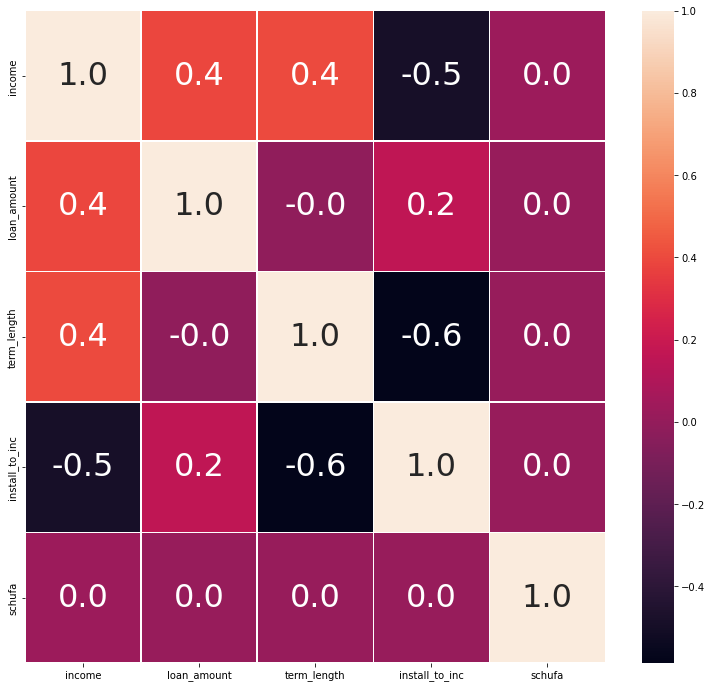

In [ ]:
#Analizamos la correlación entre las variables.
data_corr = data_train.drop(['customer', 'target_var'], axis = 1)

#sns.set(font_scale=1.5)

f,ax = plt.subplots(figsize=(13, 12))

sns.heatmap(data_corr.corr(), annot=True, linewidths=.5, fmt= '.1f',annot_kws={'fontsize': 32}, ax=ax)

In [ ]:
#sns.set(font_scale=1)

In [ ]:
import seaborn as sns
sns.set()

In [ ]:
#Regla de Sturges.
#El valor de sturges es igual a 1 + el logaritmo en base 2 del número de muestras (Aproximado hacia arriba).
sturges_value = math.ceil(1+ np.log2(data_train.shape[0]))
print("Histogram divisions: ", round(sturges_value))


Histogram divisions:  14


###2.2.1 FUNCIONES DE EXPLORACIÓN Y TRANSFORMACIÓN DE LAS VARIABLES NUMÉRICAS.

In [ ]:
data_train.skew().sort_values(ascending=False) #Revisando la asimetría.

install_to_inc    3.781650
target_var        1.903920
schufa            0.929964
num_applic_agg    0.707829
term_length       0.515719
income            0.496256
loan_amount       0.247111
customer          0.000000
dtype: float64

In [ ]:

def exp_var_num(df, variable, sturges_val,):



  #Plot
  fig, axs = plt.subplots(1, 2, figsize=(8,8))
  plt.subplots_adjust(wspace=0.4)

  axs[0].hist(df[variable], bins= sturges_val)
  axs[0].set_title('Histograma')
  plt.ylabel('Frecuencia')
  axs[0].set_xlabel(variable)


  axs[1].boxplot(df[variable])
  axs[1].set_title('Diagrama de cajas y bigotes')
  axs[1].set_xlabel(variable)

  #IQR
  cuartiles = np.quantile(df[variable], np.array([0.00, 0.25, 0.50, 0.75, 1.00]))
  IQR = cuartiles[3]-cuartiles[1]

  #Outliers
  outl1 = cuartiles[1] - 1.5*IQR
  outl2 = cuartiles[3] + 1.5*IQR

  #Outliers extremos
  outle1 = cuartiles[1] - 3*IQR
  outle2 = cuartiles[3] + 3*IQR

  #Parámetros
  SQEW = describe(df[variable], axis=0)[4]
  KURT = describe(df[variable], axis=0)[5]
  MINMAX = describe(df[variable], axis=0)[1]



  MINMAX = print('MIN-MAX:',MINMAX)
  IQR = print('IQR:',IQR)
  SQEW = print('SQEW:',SQEW)
  KURT = print('KURT:',KURT)
  OUTLIERS = print('OUTLIERS', outl1,'/', outl2)
  EXTOUTLIERS = print('EXTREME_OUTLIERS', outle1,'/', outle2)
  #print(describe(data_train[variable], axis=0))



In [ ]:
def transf_var_num (df, variable, transformacion):

    if transformacion == 'log':
        df[variable + 'log'] = np.log(df[variable])
        return(exp_var_num(df,variable + 'log',sturges_value))

    if transformacion == 'sqrt':
        df[variable + 'sqrt'] = np.sqrt(df[variable])
        return(exp_var_num(df,variable + 'sqrt',sturges_value))

    if transformacion == 'alternativa':
        df[variable + 'alternativa'] = np.log10(np.sqrt(df[variable]))
        return(exp_var_num(df,variable + 'alternativa',sturges_value))


    if transformacion == 'boxcox':
        df[variable + 'boxcox'] = stats.boxcox(df[variable])[0]
        return(exp_var_num(df,variable + 'boxcox',sturges_value))

In [ ]:
data_num_transform = data_train.copy() #Iremos probando con esta copia del dataset
data_test_num_transform = data_test.copy()

In [ ]:
#Lamba de income.
stats.boxcox(data_num_transform['schufa'])[1]

-1.0073502938411294

In [ ]:
#Lamba de install_to_inc.
stats.boxcox(data_num_transform['install_to_inc'])[1]

-0.1262436054331097

In [ ]:
##Lamba de loan_amount.
stats.boxcox(data_num_transform['loan_amount'])[1]

0.6905671466195455

###2.2.2 INGRESOS ('INCOME')

In [ ]:
data_num_transform

,income,loan_amount,term_length,install_to_inc,occup,marital,schufa,num_applic,target_var,date,date2,date3,customer,occup_agg,marital_agg,num_applic_agg
5128,27566.034908,22100.0,44.0,0.018221,Unemployed,Single,8319.004646,1,1,2018-05-15,2018-05-01,2018-01-01,1,Unemployed,Single,1
5653,21582.132769,21400.0,37.0,0.026799,Unemployed,Single,8053.211711,1,1,2011-04-04,2011-04-01,2011-01-01,1,Unemployed,Single,1
6319,5768.745417,15700.0,47.0,0.057906,Unemployed,Single,6951.266384,1,1,2013-01-26,2013-01-01,2013-01-01,1,Unemployed,Single,1
3044,25482.670342,10500.0,55.0,0.007492,Unemployed,Living together,8480.132213,Not avail.,1,2013-09-03,2013-09-01,2013-01-01,1,Unemployed,Living together,2
6317,5049.371296,16600.0,36.0,0.091320,Not avail.,Divorced,9094.400199,1,1,2008-09-11,2008-09-01,2008-01-01,1,Student,Divorced_sep,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5001,35070.028444,19600.0,46.0,0.012150,Unemployed,Divorced,11335.777807,1,0,2014-10-23,2014-10-01,2014-01-01,1,Unemployed,Divorced_sep,1
6893,27988.376545,25100.0,52.0,0.017246,Unemployed,Not avail.,11149.106878,1,0,2015-01-25,2015-01-01,2015-01-01,1,Unemployed,Single,1
6938,7832.005852,31100.0,83.0,0.047842,Student,Living together,7679.168138,1,0,2016-08-12,2016-08-01,2016-01-01,1,Student,Living together,1
7167,39260.857194,11100.0,108.0,0.002618,Employee,Single,7218.040573,1,0,2016-02-10,2016-02-01,2016-01-01,1,Employee,Single,1


MIN-MAX: (5044.157974064874, 81215.72199150338)
IQR: 17438.16667878486
SQEW: 0.4961289660829292
KURT: -0.02270440412350716
OUTLIERS -8495.25436827564 / 61257.4123468638
EXTREME_OUTLIERS -34652.50438645293 / 87414.66236504109


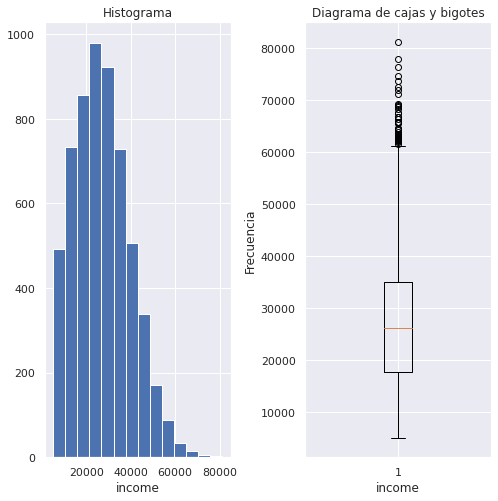

In [ ]:

exp_var_num(data_num_transform,'income',sturges_value)


MIN-MAX: (8.525986015798354, 11.30486412799274)
IQR: 0.686790390275009
SQEW: -0.686648168321436
KURT: 0.10707464748634088
OUTLIERS 8.748984878568141 / 11.496146439668177
EXTREME_OUTLIERS 7.718799293155627 / 12.52633202508069


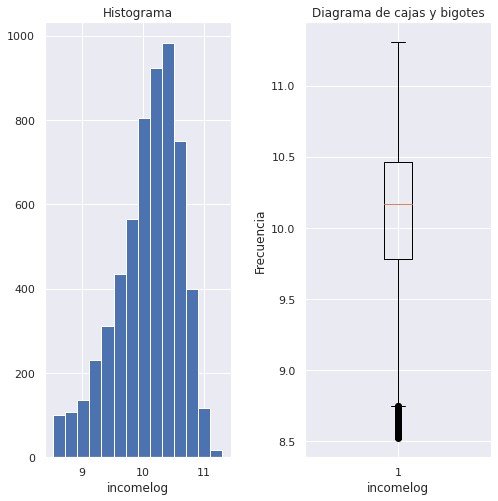

In [ ]:
#Transformación logarítmica
transf_var_num(data_num_transform, 'income', 'log' )


MIN-MAX: (71.02223577207968, 284.98372232726445)
IQR: 54.4519238927673
SQEW: -0.07379627100168511
KURT: -0.44904374801473823
OUTLIERS 51.22055501495535 / 269.02825058602457
EXTREME_OUTLIERS -30.457330824195594 / 350.7061364251755


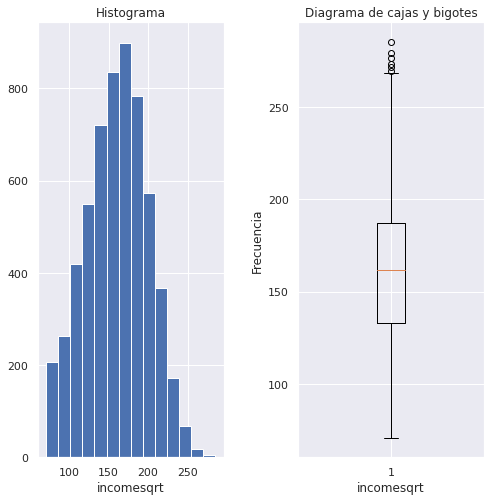

In [ ]:
#Transformación irracional
transf_var_num(data_num_transform, 'income', 'sqrt' )

MIN-MAX: (161.87280906502383, 696.1308703592724)
IQR: 135.69738732420416
SQEW: -0.04844749148860693
KURT: -0.44998173359760507
OUTLIERS 109.46789412871854 / 652.2574434255351
EXTREME_OUTLIERS -94.0781868575877 / 855.8035244118414


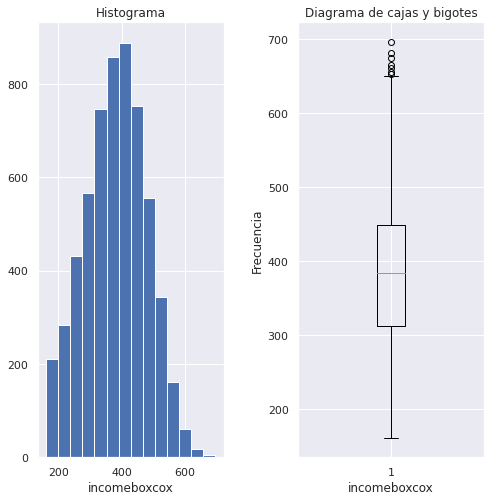

In [ ]:
#Transformación de potencia
transf_var_num(data_num_transform, 'income', 'boxcox' )

Podemos observar que hay algunos outliers y que la distribución no es demasiado simétrica. Le aplicamos la transformación logarítmica y la irracional, dando esta última un mejor resultado.

In [ ]:
var_num_transf = pd.DataFrame()
var_num_transf['incomesqrt'] = data_num_transform['incomesqrt'] #Iremos concatenando las variables que queden mejor transformadas.
var_num_transf['incomeboxcox'] = data_num_transform['incomeboxcox']



### 2.2.3 CANTIDAD DEL PRÉSTAMO ('loan_amount')

MIN-MAX: (5100.0, 50300.0)
IQR: 10400.0
SQEW: 0.24704768828035262
KURT: -0.2501033745232961
OUTLIERS -600.0 / 41000.0
EXTREME_OUTLIERS -16200.0 / 56600.0


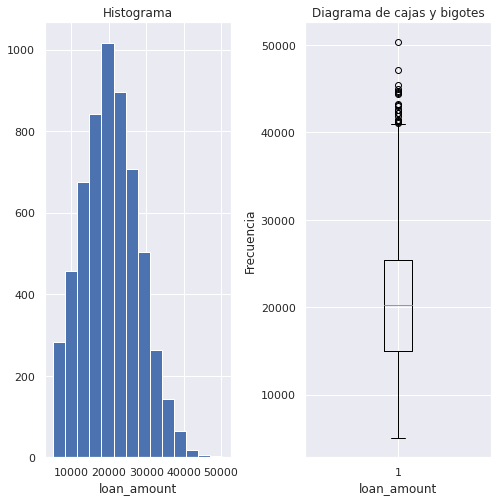

In [ ]:
exp_var_num(data_num_transform,'loan_amount',sturges_value)

MIN-MAX: (8.536995818712418, 10.82576035608783)
IQR: 0.5266989729222811
SQEW: -0.7416882244069148
KURT: 0.3183453950501707
OUTLIERS 8.825757020700927 / 10.932552912390051
EXTREME_OUTLIERS 8.035708561317504 / 11.722601371773472


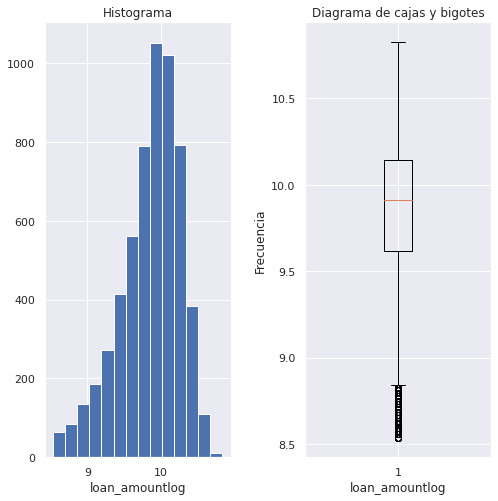

In [ ]:
#Transformación logarítmica
transf_var_num(data_num_transform, 'loan_amount', 'log' )

MIN-MAX: (71.4142842854285, 224.27661492005805)
IQR: 36.899287365933375
SQEW: -0.2269283365515576
KURT: -0.3179284945887413
OUTLIERS 67.12555609025884 / 214.72270555399234
EXTREME_OUTLIERS 11.776625041358784 / 270.0716366028924


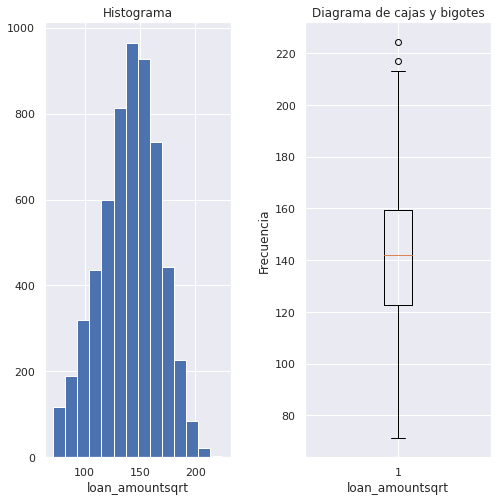

In [ ]:
#Transformación irracional
transf_var_num(data_num_transform, 'loan_amount', 'sqrt' )

MIN-MAX: (524.7148412056351, 2554.4437753227685)
IQR: 486.19019578854727
SQEW: -0.042701561876569726
KURT: -0.36755940229261297
OUTLIERS 377.5874922859974 / 2322.3482754401866
EXTREME_OUTLIERS -351.6978013968235 / 3051.6335691230074


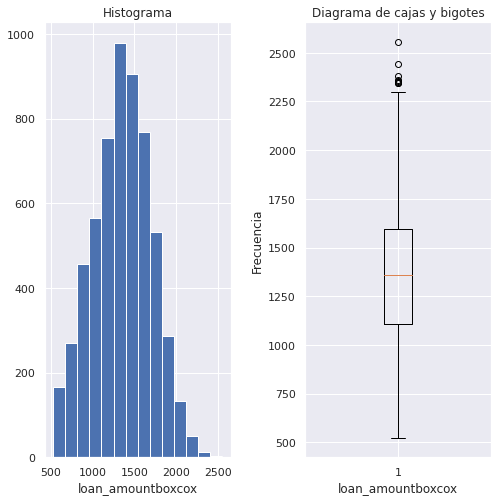

In [ ]:
#transformación de potencia
transf_var_num(data_num_transform, 'loan_amount', 'boxcox' )

In [ ]:
var_num_transf['loan_amountsqrt'] = data_num_transform['loan_amountsqrt']
var_num_transf['loan_amountboxcox'] = data_num_transform['loan_amountboxcox']

###2.2.4 LONGITUD DEL PRESTAMO ('term_length')

MIN-MAX: (12.0, 214.0)
IQR: 44.0
SQEW: 0.5155876141927381
KURT: 0.01577889375861119
OUTLIERS -24.0 / 152.0
EXTREME_OUTLIERS -90.0 / 218.0


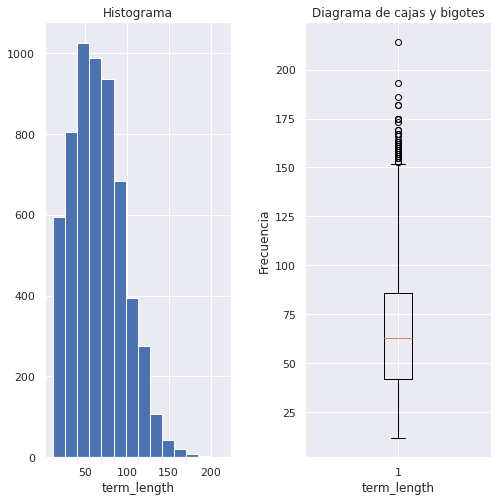

In [ ]:
exp_var_num(data_num_transform,'term_length',sturges_value)

MIN-MAX: (2.4849066497880004, 5.365976015021851)
IQR: 0.7166776779701389
SQEW: -0.6466036313313804
KURT: -0.040498779143955055
OUTLIERS 2.66265310132816 / 5.5293638132087155
EXTREME_OUTLIERS 1.5876365843729516 / 6.604380330163924


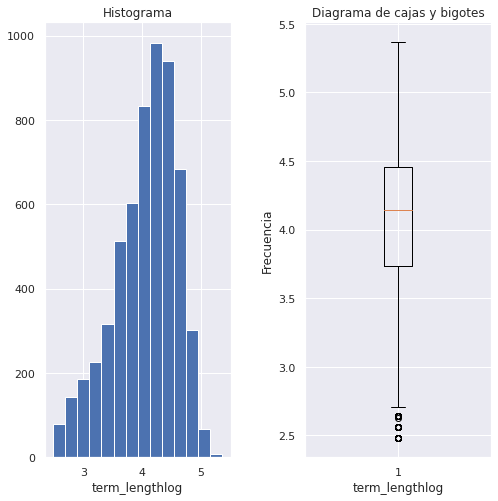

In [ ]:
#Transformación logarítmica
transf_var_num(data_num_transform, 'term_length', 'log' )

MIN-MAX: (3.4641016151377544, 14.628738838327793)
IQR: 2.7928777970878436
SQEW: -0.052310167642688365
KURT: -0.4974796724520054
OUTLIERS 2.291424002776095 / 13.46293519112747
EXTREME_OUTLIERS -1.8978926928556703 / 17.652251886759235


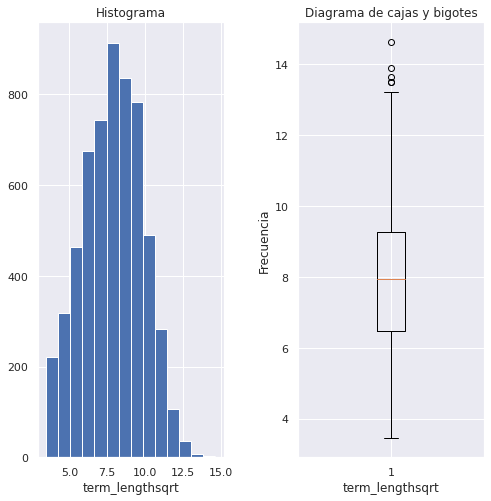

In [ ]:
#Transformación irracional
transf_var_num(data_num_transform, 'term_length', 'sqrt' )

MIN-MAX: (4.931610285738973, 27.304946666532796)
IQR: 5.596408371625905
SQEW: -0.05177814147106997
KURT: -0.4974472815725912
OUTLIERS 2.5791502958906385 / 24.96478378239426
EXTREME_OUTLIERS -5.81546226154822 / 33.35939633983312


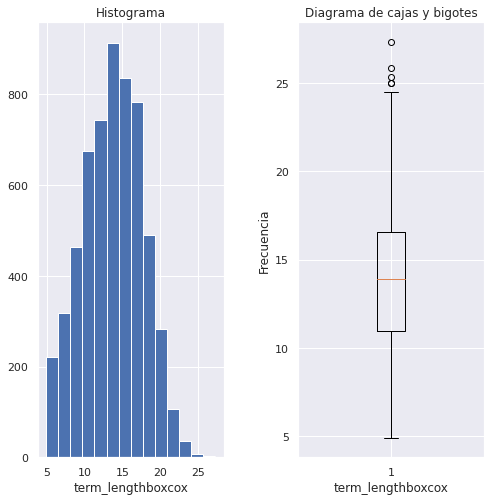

In [ ]:
#Transformación de potencia
transf_var_num(data_num_transform, 'term_length', 'boxcox' )

In [ ]:
var_num_transf['term_lengthsqrt'] = data_num_transform['term_lengthsqrt']
var_num_transf['term_lengthboxcox'] = data_num_transform['term_lengthboxcox']

###2.2.5 RATIO DE CUOTA A INGRESOS ('install_to_inc')

MIN-MAX: (0.0007291030918824973, 0.3372489101209132)
IQR: 0.017257983942845494
SQEW: 3.780685202544613
KURT: 22.96322818328887
OUTLIERS -0.01855567528347944 / 0.05047626048790253
EXTREME_OUTLIERS -0.04444265119774768 / 0.07636323640217077


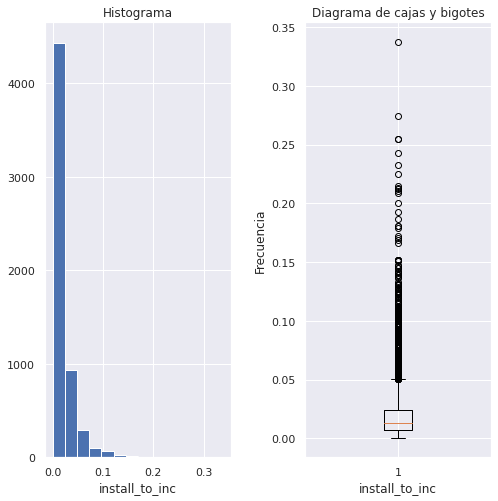

In [ ]:
exp_var_num(data_num_transform,'install_to_inc',sturges_value)

MIN-MAX: (-7.223695420477165, -1.086934015564688)
IQR: 1.2101578243853468
SQEW: 0.30631729620424825
KURT: -0.1069696162050473
OUTLIERS -6.730839078897385 / -1.8902077813559977
EXTREME_OUTLIERS -8.546075815475405 / -0.07497104477797745


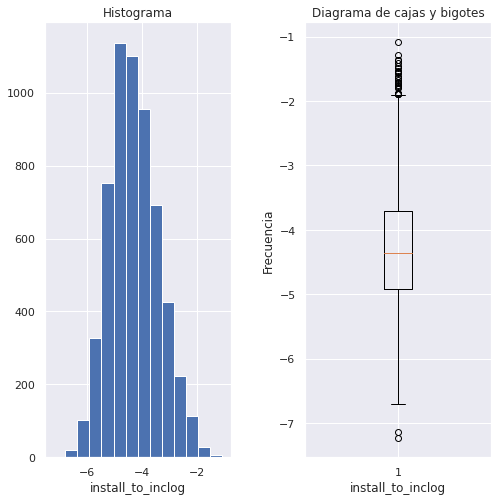

In [ ]:
#Transformación logarítmica
transf_var_num(data_num_transform, 'install_to_inc', 'log' )

MIN-MAX: (0.027001909041445518, 0.5807313579624517)
IQR: 0.07118669359207339
SQEW: 1.6539124441445603
KURT: 3.9785455927973032
OUTLIERS -0.021157025840721475 / 0.26358974852757205
EXTREME_OUTLIERS -0.12793706622883155 / 0.3703697889156822


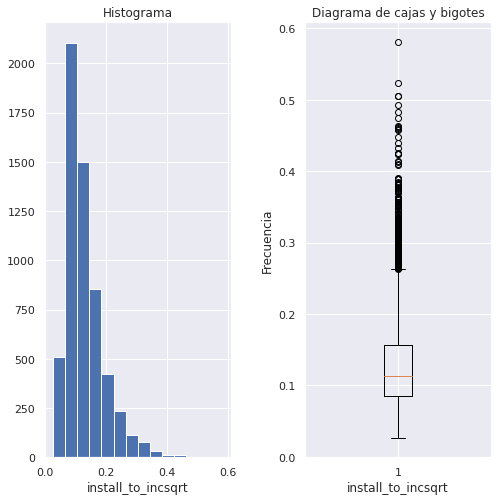

In [ ]:
#Transformación irracional
transf_var_num(data_num_transform, 'install_to_inc', 'sqrt' )

MIN-MAX: (-11.795925187779448, -1.1650389877301313)
IQR: 2.0873579325517158
SQEW: 0.008230085077977596
KURT: -0.19384726216891668
OUTLIERS -9.943069749971318 / -1.5936380197644557
EXTREME_OUTLIERS -13.074106648798892 / 1.537398879063118


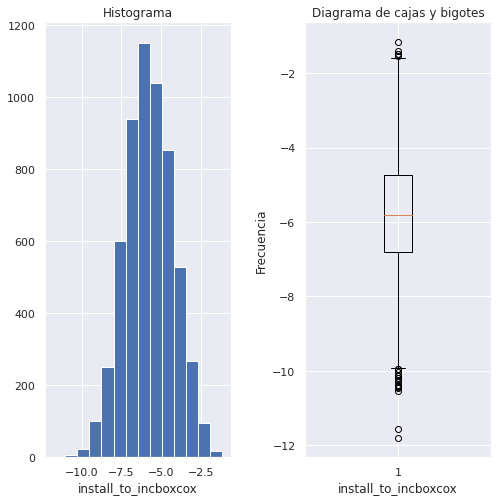

In [ ]:
#Transformación de potencia
transf_var_num(data_num_transform, 'install_to_inc', 'boxcox' )

In [ ]:
var_num_transf['install_to_inclog'] = data_num_transform['install_to_inclog']
var_num_transf['install_to_incboxcox'] = data_num_transform['install_to_incboxcox']

###2.2.6 PUNTUACIÓN SCHUFA ('shufa')

MIN-MAX: (6000.840691503237, 14839.440464391986)
IQR: 2611.8274235712242
SQEW: 0.9297266782270063
KURT: 0.36050443718380043
OUTLIERS 3330.22136845844 / 13777.531062743337
EXTREME_OUTLIERS -587.5197668983965 / 17695.272198100174


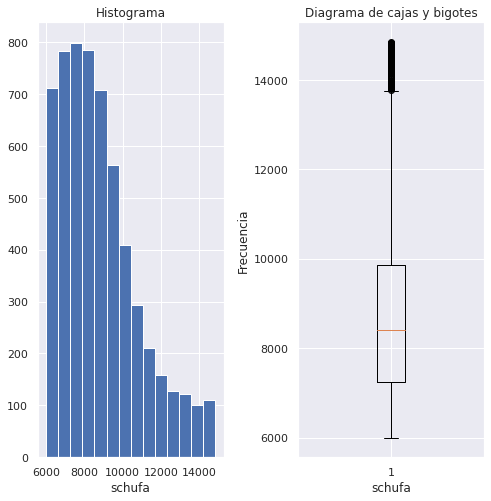

In [ ]:
exp_var_num(data_num_transform,'schufa',sturges_value)

MIN-MAX: (8.699654853645507, 9.60504381145474)
IQR: 0.3077444671262235
SQEW: 0.4765211088449703
KURT: -0.43421295340845045
OUTLIERS 8.426858972128278 / 9.657836840633172
EXTREME_OUTLIERS 7.965242271438942 / 10.119453541322507


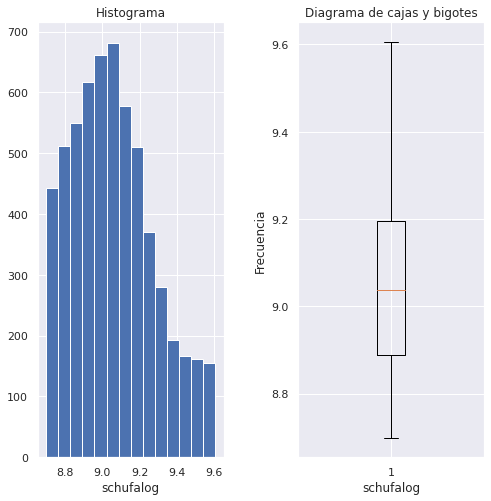

In [ ]:
#Transformación logarítmica
transf_var_num(data_num_transform, 'schufa', 'log' )

MIN-MAX: (77.46509337439178, 121.81724206528395)
IQR: 14.161508486488103
SQEW: 0.6992996744726487
KURT: -0.09752677521515674
OUTLIERS 63.89270363603148 / 120.5387375819839
EXTREME_OUTLIERS 42.65044090629932 / 141.78100031171604


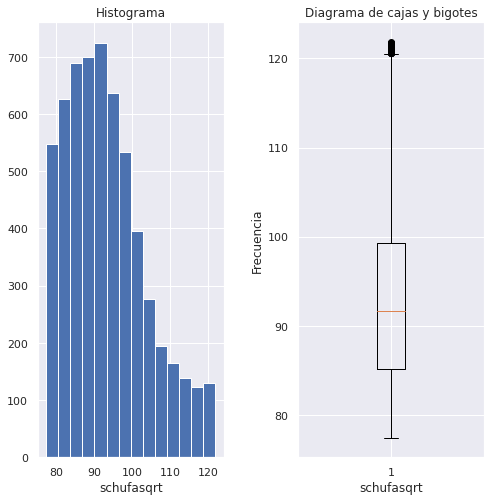

In [ ]:
#Transformación irracional
transf_var_num(data_num_transform, 'schufa', 'sqrt' )

MIN-MAX: (0.9925481585241551, 0.9926410024929788)
IQR: 3.419961469042221e-05
SQEW: 0.057645124276211074
KURT: -0.7771024552942523
OUTLIERS 0.9925237384050272 / 0.9926605368637889
EXTREME_OUTLIERS 0.9924724389829915 / 0.9927118362858245


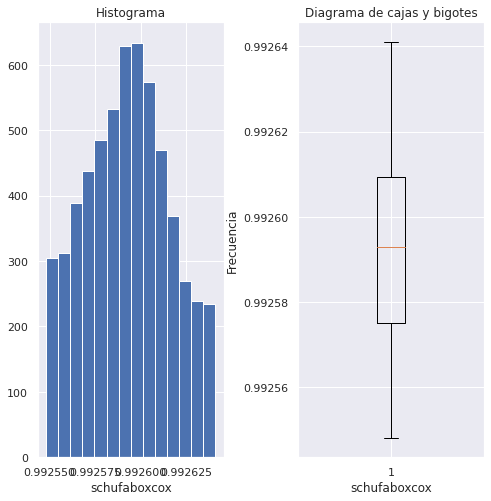

In [ ]:
#Transformación box cox
transf_var_num(data_num_transform, 'schufa', 'boxcox' )

In [ ]:
var_num_transf['schufaboxcox'] = data_num_transform['schufaboxcox']
var_num_transf['schufalog'] = data_num_transform['schufalog']

In [ ]:
var_num_transf.describe().head(10).style.format(precision=3).set_table_styles(style)

,incomesqrt,incomeboxcox,loan_amountsqrt,loan_amountboxcox,term_lengthsqrt,term_lengthboxcox,install_to_inclog,install_to_incboxcox,schufaboxcox,schufalog
count,5879.000,5879.000,5879.000,5879.000,5879.000,5879.000,5879.000,5879.000,5879.000,5879.000
mean,159.970,380.754,140.345,1349.374,7.844,13.707,-4.288,-5.774,0.993,9.059
std,38.901,96.816,26.845,349.429,1.946,3.899,0.881,1.502,0.000,0.217
min,71.022,161.873,71.414,524.715,3.464,4.932,-7.224,-11.796,0.993,8.700
25%,132.898,313.014,122.474,1106.873,6.481,10.974,-4.916,-6.812,0.993,8.888
50%,161.658,384.435,142.127,1359.772,7.937,13.892,-4.362,-5.817,0.993,9.037
75%,187.350,448.711,159.374,1593.063,9.274,16.570,-3.705,-4.725,0.993,9.196
max,284.984,696.131,224.277,2554.444,14.629,27.305,-1.087,-1.165,0.993,9.605


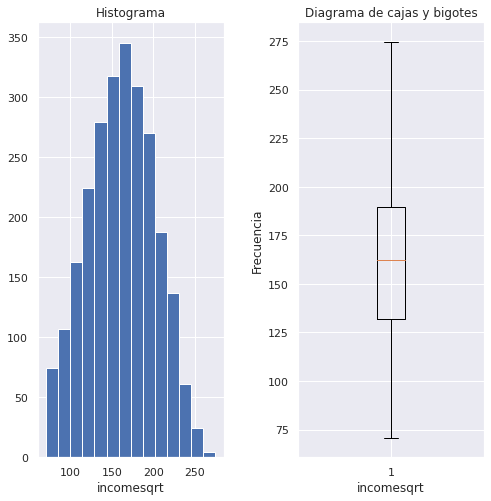

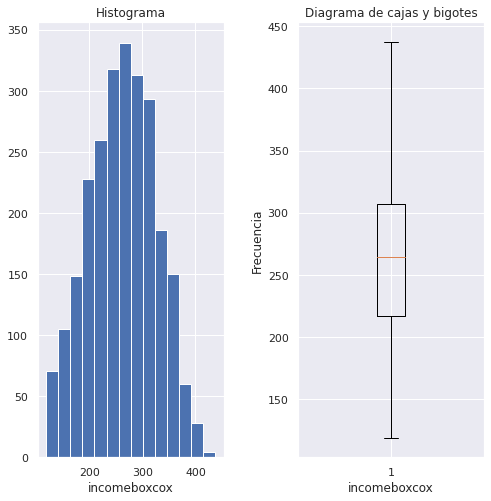

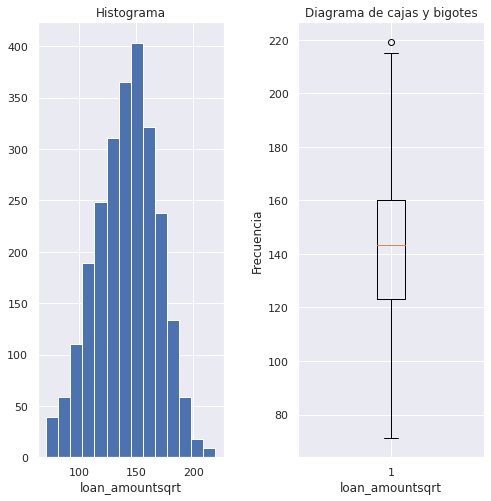

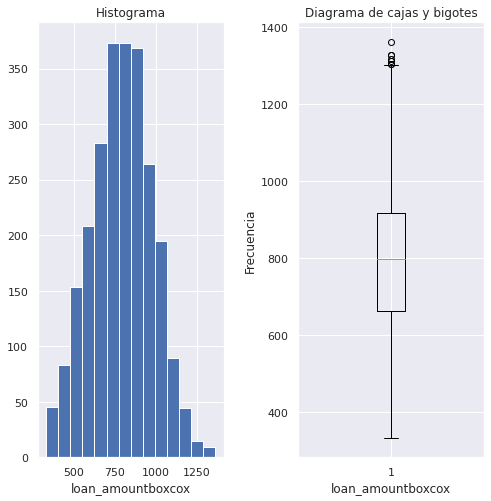

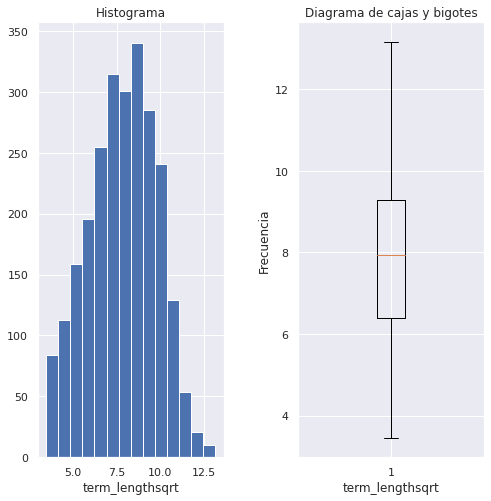

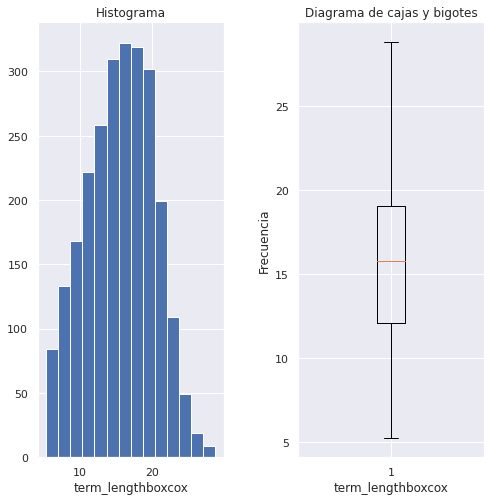

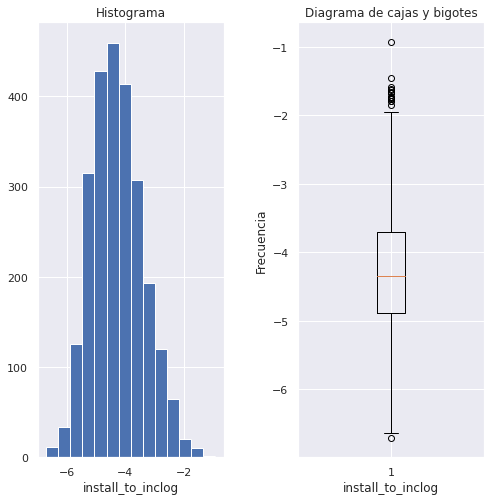

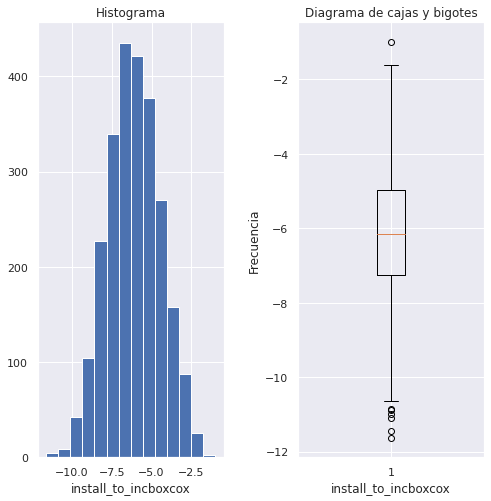

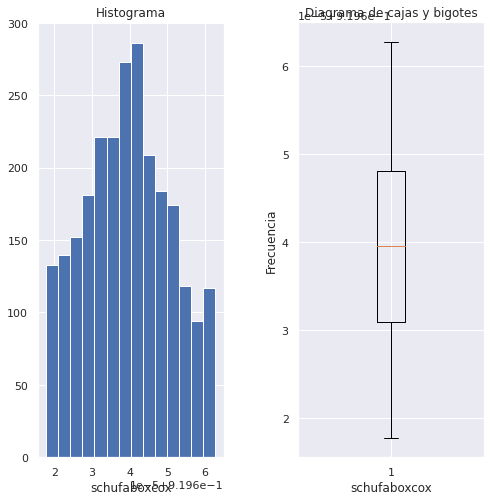

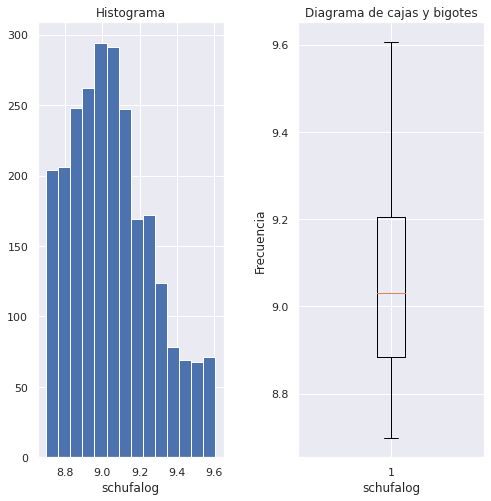

In [ ]:
#Agregamos las transformaciones al dataset de prueba.
transf_var_num(data_test_num_transform, 'income', 'sqrt')
transf_var_num(data_test_num_transform, 'income', 'boxcox')
transf_var_num(data_test_num_transform, 'loan_amount', 'sqrt')
transf_var_num(data_test_num_transform, 'loan_amount', 'boxcox')

transf_var_num(data_test_num_transform, 'term_length', 'sqrt')
transf_var_num(data_test_num_transform, 'term_length', 'boxcox')

transf_var_num(data_test_num_transform, 'install_to_inc', 'log')
transf_var_num(data_test_num_transform, 'install_to_inc', 'boxcox')
transf_var_num(data_test_num_transform, 'schufa', 'boxcox')
transf_var_num(data_test_num_transform, 'schufa', 'log')



clear_output()


In [ ]:
#Transf predicc
var_test_num_transf1 = pd.DataFrame()
var_test_num_transf1['incomesqrt'] = data_test_num_transform['incomesqrt']
var_test_num_transf1['incomeboxcox'] = data_test_num_transform['incomeboxcox']
var_test_num_transf1['loan_amountsqrt'] = data_test_num_transform['loan_amountsqrt']
var_test_num_transf1['loan_amountboxcox'] = data_test_num_transform['loan_amountboxcox']
var_test_num_transf1['term_lengthsqrt'] = data_test_num_transform['term_lengthsqrt']
var_test_num_transf1['term_lengthboxcox'] = data_test_num_transform['term_lengthboxcox']
var_test_num_transf1['install_to_inclog'] = data_test_num_transform['install_to_inclog']
var_test_num_transf1['install_to_incboxcox'] = data_test_num_transform['install_to_incboxcox']
var_test_num_transf1['schufaboxcox'] = data_test_num_transform['schufaboxcox']
var_test_num_transf1['schufalog'] = data_test_num_transform['schufalog']

In [ ]:
if input_p == '1':
  data_test_num_transform.iloc[2502:2503] = data_test_num_transform.iloc[2501:2502]

In [ ]:
#Transfromación buena.
var_test_num_transf = pd.DataFrame()
var_test_num_transf['incomesqrt'] = data_test_num_transform['incomesqrt']
var_test_num_transf['incomeboxcox'] = data_test_num_transform['incomeboxcox']
var_test_num_transf['loan_amountsqrt'] = data_test_num_transform['loan_amountsqrt']
var_test_num_transf['loan_amountboxcox'] = data_test_num_transform['loan_amountboxcox']
var_test_num_transf['term_lengthsqrt'] = data_test_num_transform['term_lengthsqrt']
var_test_num_transf['term_lengthboxcox'] = data_test_num_transform['term_lengthboxcox']
var_test_num_transf['install_to_inclog'] = data_test_num_transform['install_to_inclog']
var_test_num_transf['install_to_incboxcox'] = data_test_num_transform['install_to_incboxcox']
var_test_num_transf['schufaboxcox'] = data_test_num_transform['schufaboxcox']
var_test_num_transf['schufalog'] = data_test_num_transform['schufalog']

In [ ]:
var_test_num_transf.iloc[2502:2503] = var_test_num_transf1.iloc[2502:2503]

##2.3 CARGANDO EL DATASET CON LAS VARIABLES ORIGINALES Y TRANSFORMADAS

In [ ]:
data_train_def = data_train.copy() #set entrenamiento

data_test_def = data_test.copy() #set de prueba

data_train_def

,income,loan_amount,term_length,install_to_inc,occup,marital,schufa,num_applic,target_var,date,date2,date3,customer,occup_agg,marital_agg,num_applic_agg
5128,27566.034908,22100.0,44.0,0.018221,Unemployed,Single,8319.004646,1,1,2018-05-15,2018-05-01,2018-01-01,1,Unemployed,Single,1
5653,21582.132769,21400.0,37.0,0.026799,Unemployed,Single,8053.211711,1,1,2011-04-04,2011-04-01,2011-01-01,1,Unemployed,Single,1
6319,5768.745417,15700.0,47.0,0.057906,Unemployed,Single,6951.266384,1,1,2013-01-26,2013-01-01,2013-01-01,1,Unemployed,Single,1
3044,25482.670342,10500.0,55.0,0.007492,Unemployed,Living together,8480.132213,Not avail.,1,2013-09-03,2013-09-01,2013-01-01,1,Unemployed,Living together,2
6317,5049.371296,16600.0,36.0,0.091320,Not avail.,Divorced,9094.400199,1,1,2008-09-11,2008-09-01,2008-01-01,1,Student,Divorced_sep,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5001,35070.028444,19600.0,46.0,0.012150,Unemployed,Divorced,11335.777807,1,0,2014-10-23,2014-10-01,2014-01-01,1,Unemployed,Divorced_sep,1
6893,27988.376545,25100.0,52.0,0.017246,Unemployed,Not avail.,11149.106878,1,0,2015-01-25,2015-01-01,2015-01-01,1,Unemployed,Single,1
6938,7832.005852,31100.0,83.0,0.047842,Student,Living together,7679.168138,1,0,2016-08-12,2016-08-01,2016-01-01,1,Student,Living together,1
7167,39260.857194,11100.0,108.0,0.002618,Employee,Single,7218.040573,1,0,2016-02-10,2016-02-01,2016-01-01,1,Employee,Single,1


In [ ]:
data_train_def = pd.concat([data_train_def, var_num_transf], axis = 1)
data_test_def = pd.concat([data_test_def, var_test_num_transf], axis = 1)

In [ ]:
data_train_def = data_train_def.reset_index(drop = True)

data_test_def

,income,loan_amount,term_length,install_to_inc,occup,marital,schufa,num_applic,target_var,date,...,incomesqrt,incomeboxcox,loan_amountsqrt,loan_amountboxcox,term_lengthsqrt,term_lengthboxcox,install_to_inclog,install_to_incboxcox,schufaboxcox,schufalog
9060,18319.717090,14300.0,62.0,0.012590,1,Single,6009.668574,1,1,2013-04-28,...,135.350349,222.118581,119.582607,636.614785,7.874008,15.647321,-4.374853,-6.203107,0.919618,8.701125
2515,11096.442541,21500.0,43.0,0.045059,Unemployed,Separated,6252.322374,1,1,2012-02-08,...,105.339653,174.538371,146.628783,822.249432,6.557439,12.477273,-3.099772,-3.955058,0.919621,8.740708
6888,17349.974315,25500.0,48.0,0.030620,Unemployed,Divorced,6986.677987,1,1,2015-11-19,...,131.719301,216.391490,159.687194,915.130698,6.928203,13.364431,-3.486114,-4.591014,0.919629,8.851760
2982,23592.039687,10300.0,74.0,0.005900,Not avail.,Single,7333.457051,1,1,2013-01-13,...,153.597004,250.789416,101.488916,518.097621,8.602325,17.423102,-5.132831,-7.760110,0.919632,8.900202
8822,8641.941079,15800.0,27.0,0.067715,Student,Not avail.,7791.186002,1,1,2013-02-23,...,92.962041,154.731045,125.698051,677.743563,5.196152,9.262396,-2.692454,-3.323639,0.919636,8.960748
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5260,22088.912515,20000.0,28.1,0.030890,Unemployed,Single,8291.557541,1,0,2017-09-24,...,148.623392,242.991672,141.421356,785.778412,5.300943,9.507306,-3.477315,-4.576112,0.919639,9.022993
3752,19009.514606,16700.0,81.0,0.010846,Employee,Single,10464.204745,1,0,2018-08-02,...,137.874996,226.096191,129.228480,701.719497,9.000000,18.398773,-4.523980,-6.495493,0.919650,9.255716
7445,37124.636593,17500.0,77.0,0.006122,Unemployed,Married,6924.154247,2,0,2008-12-19,...,192.677546,311.664066,132.287566,722.628598,8.774964,17.846152,-5.095885,-7.680008,0.919628,8.842771
979,38482.942470,27400.0,51.0,0.013961,Unemployed,Divorced,8787.656854,1,0,2014-01-13,...,196.170697,317.074140,165.529454,957.319414,7.141428,13.876673,-4.271498,-6.004300,0.919642,9.081103


## 4 FEATURE SELECTION ("Selección de las variables")

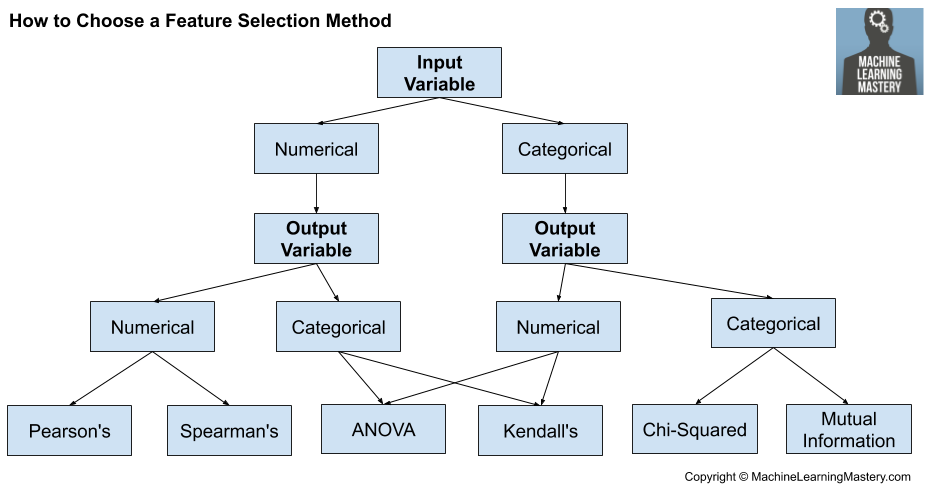

In [ ]:
#Separamos la variable objetivo.
y_train = data_train_def['target_var']
y_test = data_test_def['target_var']

### 4.1 NUMERICAL INPUT, CATEGORICAL OUTPUT

El test "ANOVA" es un análisis de varianza. Se utliza para comparar las media de dos gripupos. Para determinar la correlación entre la variable objetivo y las variables numéricas de entrada, se saca el ratio F, 1que es el ratio entre la varianza de las medias de los grupos y el promedio de la varianza dentro de los grupos. Cuanto mayor sea el ratio, más relacionada estará la variable con la variable objetivo.

In [ ]:
x_train_num = data_train_def[['income','loan_amount','term_length','install_to_inc','schufa',
                          'incomesqrt','incomeboxcox','loan_amountsqrt', 'loan_amountboxcox','install_to_inclog', 'install_to_incboxcox', 'term_lengthsqrt', 'term_lengthboxcox', 'schufalog', 'schufaboxcox']]
x_test_num = data_test_def[['income','loan_amount','term_length','install_to_inc','schufa',
                          'incomesqrt','incomeboxcox','loan_amountsqrt', 'loan_amountboxcox','install_to_inclog', 'install_to_incboxcox', 'term_lengthsqrt', 'term_lengthboxcox', 'schufalog', 'schufaboxcox']]


In [ ]:
#y_train = y_train.reset_index(inplace=True, drop=True)
#y_test = y_test.reset_index(inplace=True, drop=True)

In [ ]:
#Creamos una variable falsa para comprobar.
variable_false = []
for i in x_train_num.index:
  variable_false.append(i)
len(variable_false)
variable_false = pd.DataFrame(variable_false, columns=['variable_false'])
clear_output()

In [ ]:
#variable_false.shape

In [ ]:
x_train_num_var_false = x_train_num.copy()
x_train_num_var_false = x_train_num_var_false.reset_index(drop=True)
x_train_num_var_false['var_false'] = pd.DataFrame(variable_false)
x_train_num_var_false

,income,loan_amount,term_length,install_to_inc,schufa,incomesqrt,incomeboxcox,loan_amountsqrt,loan_amountboxcox,install_to_inclog,install_to_incboxcox,term_lengthsqrt,term_lengthboxcox,schufalog,schufaboxcox,var_false
0,27566.034908,22100.0,44.0,0.018221,8319.004646,166.030223,395.343546,148.660687,1446.952405,-4.005196,-5.212387,6.633250,11.279312,9.026298,0.992592,0
1,21582.132769,21400.0,37.0,0.026799,8053.211711,146.908586,347.730638,146.287388,1415.113858,-3.619393,-4.588040,6.082763,10.176452,8.993826,0.992588,1
2,5768.745417,15700.0,47.0,0.057906,6951.266384,75.952257,173.752914,125.299641,1142.337285,-2.848942,-3.428634,6.855655,11.724908,8.846679,0.992570,2
3,25482.670342,10500.0,55.0,0.007492,8480.132213,159.632924,379.386329,102.469508,864.905760,-4.893957,-6.771827,7.416198,12.848037,9.045481,0.992594,3
4,5049.371296,16600.0,36.0,0.091320,9094.400199,71.058928,161.961100,128.840987,1187.224065,-2.393380,-2.794301,6.000000,10.010651,9.115414,0.992601,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5874,35070.028444,19600.0,46.0,0.012150,11335.777807,187.269935,448.509516,140.000000,1331.720633,-4.410459,-5.901809,6.782330,11.577998,9.335719,0.992622,5874
5875,27988.376545,25100.0,52.0,0.017246,11149.106878,167.297270,398.507226,158.429795,1580.033775,-4.060165,-5.303843,7.211103,12.437089,9.319115,0.992620,5875
5876,7832.005852,31100.0,83.0,0.047842,7679.168138,88.498621,204.133178,176.351921,1832.330130,-3.039851,-3.705501,9.110434,16.243131,8.946267,0.992582,5876
5877,39260.857194,11100.0,108.0,0.002618,7218.040573,198.143527,475.831073,105.356538,898.797983,-5.945414,-8.857543,10.392305,18.812281,8.884339,0.992575,5877


In [ ]:
# k = 'all'  , por lo que todas las variables seran true y todas las variables estarán en la lista de variables seleccionadas. Solo nos ineteresa la score.

In [ ]:
# selección de las variables con ANOVA
from sklearn.datasets import make_classification
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

# Definimos el tipo de feature selection. Seleccionamos todas las variables y se puntuan.
fs = SelectKBest(score_func=f_classif, k='all').fit(x_train_num, y_train)


# Convertimos los datos a un  array
x_selected = fs.transform(x_train_num)
#x_selected.shape

# 3. Lista de las variables de entrada.
feature_names = list(x_train_num.columns)
#feature_names

# 4. lista de las variables seleccionadas (todas)
bool_features = fs.get_support() #lista de valores booleanos (True si ha sido seleccionada, False si no).(k=all, todas van a ser True)
#mask

# lista de las variables seleccionadas (que seran todas)
new_features = [] # Lista de las mejores K variables.

#juntamos listas en una sola
for bool, feature in zip(bool_features, feature_names):
    if bool:
        #print(feature)
        new_features.append(feature)
        #print(bool)




#for i, j in zip(mask, feature_names):
    #if i==True:
        #print(feature)
        #new_features.append(feature)

#new_features


In [ ]:
#Comprobamos si se ha desechado alguna variable. A priori hemos mantenido todas las variables con el SelectKBest(k='all'). no hemos obligado al modelo a elegir un cierto numero de variables.
#Lo único que hemos buscado es si estas eran aptas o no (true o false). Estas lo son, por lo que se han mantenido cuando las hemos pasado for el for loop.
new_features_df = pd.DataFrame(new_features, columns = ['variables seleccionadas'])
features_df = pd.DataFrame(x_train_num.columns, columns = ['variables originales'])
comprobar_selected_features = pd.concat([new_features_df, features_df], axis = 1)
comprobar_selected_features.head(19).style.format(precision=3).set_table_styles(style)

,variables seleccionadas,variables originales
0,income,income
1,loan_amount,loan_amount
2,term_length,term_length
3,install_to_inc,install_to_inc
4,schufa,schufa
5,incomesqrt,incomesqrt
6,incomeboxcox,incomeboxcox
7,loan_amountsqrt,loan_amountsqrt
8,loan_amountboxcox,loan_amountboxcox
9,install_to_inclog,install_to_inclog


In [ ]:
# Filtramos las variables seleccionadas (Que son todas)
x_train_num_def = data_train_def[new_features]
x_test_num_def = data_test_def[new_features]
x_train_num_def.reset_index(inplace=True, drop = True)
x_test_num_def.reset_index(inplace=True, drop = True)
#x_train_num_def

In [ ]:
#Analizamos la puntuación obtenida por cada variable.
score_num = []
for features_punt in zip(feature_names,fs.scores_):
  score_num.append(features_punt)

score_num = pd.DataFrame(score_num, columns=['Variables', 'Puntuación'])
score_num = score_num.sort_values(by=['Puntuación'], ascending=False)
score_num.reset_index(inplace=True, drop=True)
score_num.head(19).style.format(precision=3).set_table_styles(style)

,Variables,Puntuación
0,schufaboxcox,866.262
1,schufalog,789.661
2,incomesqrt,741.192
3,incomeboxcox,739.294
4,schufa,689.432
5,income,678.909
6,install_to_incboxcox,478.912
7,install_to_inclog,477.199
8,term_length,341.273
9,term_lengthboxcox,298.335


In [ ]:
#Se eligen las variables que han dado mejor resultado
selected_num = ['schufaboxcox', 'incomesqrt', 'install_to_incboxcox', 'term_length', 'loan_amountboxcox']

### 4.2 CATEGORICAL INPUT, CATEGORICAL OUTPUT

Para las variables categóricas se ha utilizado el test de chi cuadrado, con el que hemos medido la independencia entre la variable objetivo y las variables de entrada.

In [ ]:
x_train_cat = data_train_def[['occup', 'marital', 'num_applic', 'occup_agg', 'marital_agg', 'num_applic_agg', ]]
x_test_cat = data_test_def[['occup', 'marital', 'num_applic', 'occup_agg', 'marital_agg', 'num_applic_agg', ]]



#Se cambia el dtype a string para el encoding.
x_train_cat = x_train_cat.astype({"num_applic": str})
x_test_cat = x_test_cat.astype({"num_applic": str})

In [ ]:
x_train_cat

,occup,marital,num_applic,occup_agg,marital_agg,num_applic_agg
0,Unemployed,Single,1,Unemployed,Single,1
1,Unemployed,Single,1,Unemployed,Single,1
2,Unemployed,Single,1,Unemployed,Single,1
3,Unemployed,Living together,Not avail.,Unemployed,Living together,2
4,Not avail.,Divorced,1,Student,Divorced_sep,1
...,...,...,...,...,...,...
5874,Unemployed,Divorced,1,Unemployed,Divorced_sep,1
5875,Unemployed,Not avail.,1,Unemployed,Single,1
5876,Student,Living together,1,Student,Living together,1
5877,Employee,Single,1,Employee,Single,1


In [ ]:
#Feature encoding.

from sklearn.preprocessing import OrdinalEncoder
def encoding(x_train, x_test):

  enc = OrdinalEncoder(categories=[['Employee','2','Student','1','Not avail.','Unemployed','3'],
                                    ['Married','Living together','Not avail.','Single','Divorced','Separated'],
                                    ['2','Not avail.','1'],
                                    ['Employee','Student','Unemployed'],
                                    ['Married', 'Living together','Single','Divorced_sep'],
                                    ['2','1']
                                   ])


  enc.fit(x_train)
  x_train_enc = enc.transform(x_train)
  x_test_enc = enc.transform(x_test)
  return(x_train_enc, x_test_enc)


In [ ]:
x_train_cat_enc, x_test_cat_enc = encoding(x_train_cat, x_test_cat)
x_train_cat_enc

array([[5., 3., 2., 2., 2., 1.],
       [5., 3., 2., 2., 2., 1.],
       [5., 3., 2., 2., 2., 1.],
       ...,
       [2., 1., 2., 1., 1., 1.],
       [0., 3., 2., 0., 2., 1.],
       [0., 3., 2., 0., 2., 1.]])

In [ ]:

x_train_cat_enc = pd.DataFrame(x_train_cat_enc, columns = ['occup',	'marital',	'num_applic',	'occup_agg', 'marital_agg',	'num_applic_agg'])
x_test_cat_enc = pd.DataFrame(x_test_cat_enc, columns = ['occup',	'marital',	'num_applic',	'occup_agg', 'marital_agg',	'num_applic_agg'])

In [ ]:
# selección de las variables con chi2
from sklearn.datasets import make_classification
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2


#Definimos el tipo de feature selection. Seleccionamos todas las variables y se puntuan.
fs = SelectKBest(score_func=chi2, k='all').fit(x_train_cat_enc, y_train)


#Convertimos los datos en array
x_train_cat_fs = fs.transform(x_train_cat_enc)
x_test_cat_fs = fs.transform(x_test_cat_enc)

#x_selected.shape

#3. Lista de las variables de entrada.

feature_names = list(x_train_cat_enc.columns)
#feature_names

#lista de las variables seleccionadas (todas)
mask = fs.get_support() #lista de valores booleanos (True si ha sido seleccionada, False si no).(k=all, todas van a ser True)
#mask

#lista de las variables seleccionadas (que seran todas)
new_features = [] # Lista de las mejores K variables.

#zip junta listas en una sola.
for bool, feature in zip(mask, feature_names):
    if bool:
        #print(feature)
        new_features.append(feature)
        #print(bool)




#for i, j in zip(mask, feature_names):
    #if i==True:
        #print(feature)
        #new_features.append(feature)

#new_features


In [ ]:
fs.scores_[0]

607.8121499025767

In [ ]:
score_cat = []
for features_punt in zip(feature_names,fs.scores_):
  score_cat.append(features_punt)
score_cat = pd.DataFrame(score_cat, columns=['Variables', 'Puntuación'])

score_cat = score_cat.sort_values(by=['Puntuación'], ascending=False)
score_cat.reset_index(inplace=True, drop=True)
score_cat.head(19).style.format(precision=3).set_table_styles(style)


,Variables,Puntuación
0,occup,607.812
1,occup_agg,228.106
2,marital,130.840
3,marital_agg,73.286
4,num_applic,13.505
5,num_applic_agg,7.291


In [ ]:
selected_cat = ['occup', 'marital','num_applic']

In [ ]:
#Aquellas variables que no han sido transformadas han obtenido mejores resultados.

In [ ]:
x_train_cat_def = x_train_cat_enc[['occup', 'marital','num_applic']]
x_test_cat_def = x_test_cat_enc[['occup', 'marital','num_applic']]

In [ ]:
x_train_cat_def

,occup,marital,num_applic
0,5.0,3.0,2.0
1,5.0,3.0,2.0
2,5.0,3.0,2.0
3,5.0,1.0,1.0
4,4.0,4.0,2.0
...,...,...,...
5874,5.0,4.0,2.0
5875,5.0,2.0,2.0
5876,2.0,1.0,2.0
5877,0.0,3.0,2.0


In [ ]:
x_train_num_def = x_train_num_def[selected_num]
x_test_num_def = x_test_num_def[selected_num]
x_train_cat_def = x_train_cat_def[selected_cat]
x_test_cat_def = x_test_cat_def[selected_cat]

#5 MODELO

###5.1 ESTANDARIZACIÓN

In [ ]:
from sklearn.preprocessing import StandardScaler

# Estandarizamos los valores para que el rango de las distintas variables sea parecido
sc_x = StandardScaler()

#Datasets de variable objetivo.
x_train_num_def_aux = sc_x.fit_transform(x_train_num_def)
x_test_num_def_aux = sc_x.fit_transform(x_test_num_def)

# Convirtiendo numpy array a pandas dataframe.
x_train_num_def = pd.DataFrame(x_train_num_def_aux, columns = x_train_num_def.columns)
x_test_num_def = pd.DataFrame(x_test_num_def_aux, columns = x_test_num_def.columns)

In [ ]:
#Dejamos listos los datasets de variables de entrada.
x_train = pd.concat([x_train_num_def, x_train_cat_def], axis = 1)
x_test = pd.concat([x_test_num_def, x_test_cat_def], axis = 1)

In [ ]:
x_train.describe().head(19).style.format(precision=3).set_table_styles(style)

,schufaboxcox,incomesqrt,install_to_incboxcox,term_length,loan_amountboxcox,occup,marital,num_applic
count,5879.000,5879.000,5879.000,5879.000,5879.000,5879.000,5879.000,5879.000
mean,-0.000,-0.000,0.000,0.000,0.000,2.967,2.694,1.394
std,1.000,1.000,1.000,1.000,1.000,2.156,1.557,0.886
min,-1.933,-2.287,-4.011,-1.738,-2.360,0.000,0.000,0.000
25%,-0.768,-0.696,-0.691,-0.760,-0.694,0.000,1.000,0.000
50%,0.006,0.043,-0.028,-0.076,0.030,4.000,3.000,2.000
75%,0.715,0.704,0.699,0.674,0.697,5.000,4.000,2.000
max,2.092,3.214,3.070,4.846,3.449,6.000,5.000,2.000


In [ ]:
data_num_transform = pd.concat([data_num_transform, data_test_num_transform], axis = 0)


MIN-MAX: (12.0, 214.0)
IQR: 45.0
SQEW: 0.48422427391757894
KURT: -0.06493670881163238
OUTLIERS -26.5 / 153.5
EXTREME_OUTLIERS -94.0 / 221.0


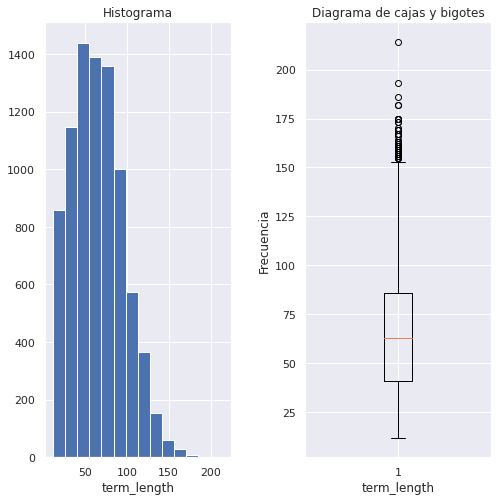

In [ ]:
exp_var_num(data_num_transform,'term_length',sturges_value)

MIN-MAX: (-1.7380689108554588, 4.846359477311553)
IQR: 1.4342319261353886
SQEW: 0.5155876141927382
KURT: 0.015778893758611634
OUTLIERS -2.911531395875322 / 2.8253963086662326
EXTREME_OUTLIERS -5.062879285078405 / 4.976744197869316


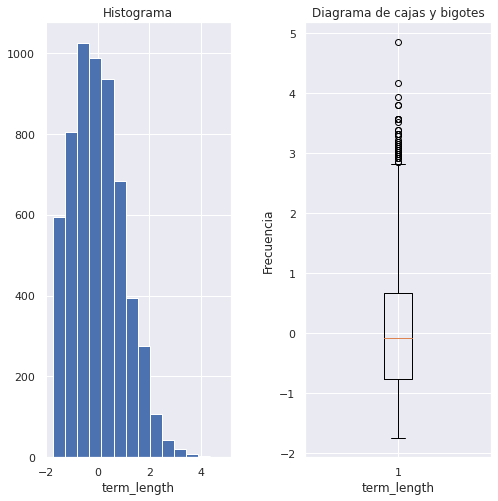

In [ ]:
exp_var_num(x_train,'term_length',sturges_value)

###5.0.2 SELECCIÓN DE LAS MEJORES VARIABLES

In [ ]:
#Una vez obtenido la "mejor versión" de cada variable, hallamos el número de variables óptimo para la elaboración del modelo.
#utilizamos la métrica roc_auc (El area debajo de la curva ROC o "AUC") para obtener las mejores variables.
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFECV

#utilizamos recursive feature elimination. Va eliminando variables y comparando los resultados.
#Comprobamos cuál es el número óptimo de variables para el modelo.
log_reg = LogisticRegression()
rfe_cv = RFECV(estimator=log_reg, step=1, cv=5,scoring= 'roc_auc')
rfe_cv = rfe_cv.fit(x_train, y_train)



#from sklearn.metrics import SCORERS
#SCORERS.keys()

print('Número óptimo de variables :', rfe_cv.n_features_)
print('Mejores variables :', x_train.columns[rfe_cv.support_])
optimal_variables = x_train.columns[rfe_cv.support_]

Número óptimo de variables : 8
Mejores variables : Index(['schufaboxcox', 'incomesqrt', 'install_to_incboxcox', 'term_length',
       'loan_amountboxcox', 'occup', 'marital', 'num_applic'],
      dtype='object')


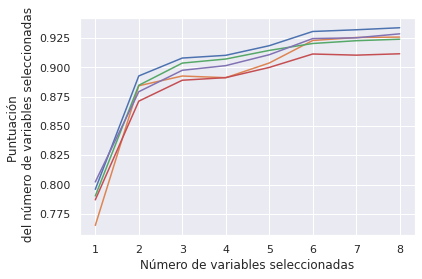

In [ ]:

plt.figure()
plt.xlabel("Número de variables seleccionadas")
plt.ylabel("Puntuación \n del número de variables seleccionadas")
plt.plot(range(1, len(x_train.columns) + 1), rfe_cv.grid_scores_)
plt.show()


##5.1 TRAINING

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn import metrics
from plotnine import ggplot, aes, geom_line,geom_abline
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import average_precision_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV


##5.2 REGRESIÓN LOGÍSTICA

###5.2.1 DEFINICIÓN Y ENTRENAMIENTO DEL MODELO

In [ ]:
#1) Definimos el modelo
log_reg = LogisticRegression(max_iter=100)


#2) Parametros del Gridsearch. Esta es una ejeameinta utilizada para tunear los hiperparámetros. Se utiliza CV para la elección de los mejores parámetros dados.
grid={"C":np.logspace(-3,3,100), #Valores entre 1e-4 y 1e4. valores mas altos, regularizacion más fuerte. np.logspace(): 1er valor = comienzo (10e-3), 2o valor = final (10e+3), 3er valor = cuántos números.
      "solver" : ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'], #Solucionadores de la regresión logística.
      "penalty":["l1","l2"]}# l1 lasso, l2 ridge. Penalizadores.

# 3) Iniciamos el Gridsearch con regresión logística.
log_reg =GridSearchCV(log_reg,grid,scoring='roc_auc',cv=2)
#log_reg_1 = RandomizedSearchCV(log_reg, grid, cv=2). Random search, da resultados similares.

In [ ]:
# 4) Entrenamos el modelo
log_reg.fit(x_train, y_train)


#Ajuste de hiperparámetros y precisión.
clear_output(wait=True)
print("Ajuste hiperparametros :(mejores parametros) ",log_reg.best_params_)
print("Accuracy :",log_reg.best_score_)

Ajuste hiperparametros :(mejores parametros)  {'C': 23.10129700083158, 'penalty': 'l2', 'solver': 'liblinear'}
Accuracy : 0.9227830942605193


###5.2.2 COMPROBACIÓN Y RESULTADOS

In [ ]:
# 1) Predicción con el modelo estimado.
y_test_1 = log_reg.predict(x_test)

# 2) Prediccion de la probabilidad. (De 0 a 1).
y_test_1_prob = log_reg.predict_proba(x_test)

# 3) Sacamos probabilidad de default.
  #y_test_1_prob[:][0] es la probabilidad de que pertenezca a clase "0"
  #y_test_1_prob[:][1] es la probabilidad de  que pertenezca a clase "1".
y_test_1_prob = y_test_1_prob[:][:,1]
#print(y_test_1_prob[:][:,1])
#print(y_test_1)

AUROC : 0.9259
Gini : 0.8518
Precision:  0.7060931899641577
Sensibilidad:  0.5267379679144385
Accuracy:  0.8965241709948062
F1 Score: 0.6033690658499234


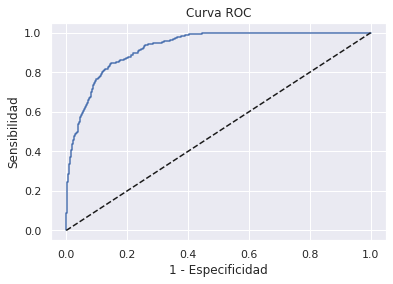

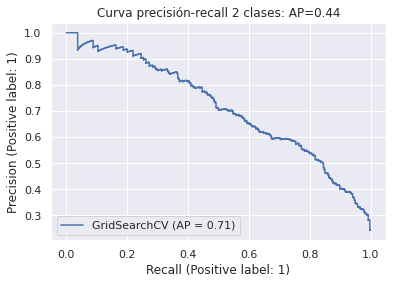

In [ ]:
# 4) Dataframe con las probabilidades de default y la clase.
y_test_2 = y_test.copy()
y_test_2.reset_index(drop = True, inplace = True)
y_test_2_prob = pd.concat([y_test_2, pd.DataFrame(y_test_1_prob)], axis = 1)
y_test_2_prob.columns = ['y_test_class_actual', 'y_test_proba']
#y_test_2_prob['y_test_proba'] = y_test_2_prob['y_test_proba'] + (data_test_def['pd_coeff'] - anual_pd_mean)

#Index
y_test_2_prob.index = x_test.index


# 5) Obtenemos valores para dibujar la curva ROC. #Y axis: TPR o Recall, X axis: FPR = fp/ (fp+tn)
fpr, tpr, threshold = metrics.roc_curve(y_test_2_prob['y_test_class_actual'],
                                         y_test_2_prob['y_test_proba'])



# 6) Dibujando la curva de ROC. https://www.scielo.cl/scielo.php?script=sci_arttext&pid=S0716-10182012000200003
plt.plot(fpr, tpr)
# Dibujamos una linea diagonal negra (linea de no discriminación) que representa un modelo sin abilidad predictiva.
plt.plot(fpr, fpr, linestyle = '--', color = 'k')
plt.xlabel('1 - Especificidad')
plt.ylabel('Sensibilidad')
plt.title('Curva ROC');


# 7). AUROC. (Area debajo de la curva ROC). Esta métrica nos informa de la efectividad del modelo en la puntuación.
      #Se podría decir que es la probabilidad de que puntúe a un cliente aleatorio que sea positivo por encima de uno que sea negativo.
AUROC = metrics.roc_auc_score(y_test_2_prob['y_test_class_actual'], y_test_2_prob['y_test_proba'])
print("AUROC :", round(AUROC, 4))

# 8). Gini. Esta métrica nos informa de la capacidad discriminatoria del modelo en función de la puntuación que se da. Puede ir de -1 a 1.
Gini = AUROC * 2 - 1
print("Gini :", round(Gini, 4))

# 9). Matriz de confusión (Se vuelve a hacer más adelante, ya que esta no puede modificarse casi.)

tn, fp, fn, tp = metrics.confusion_matrix(y_test,y_test_1).ravel()


#plot_confusion_matrix(log_reg, x_test, y_test)




# 10). Curva Precisión-Recall.
average_precision = average_precision_score(y_test, y_test_1)
disp_1 = plot_precision_recall_curve(log_reg, x_test, y_test)
disp_1.ax_.set_title('Curva precisión-recall 2 clases: '
                   'AP={0:0.2f}'.format(average_precision))

# 11). Precisión, Recall, Accuracy, Puntuación F1.

print("Precision: ", tp/(tp+fp))   #Precisión: true positives (tp)/ total predictive positives (tp + fp). Porcentaje de predicciones de positivo que son correctas. (valor alto, pocos falsos positivos)

print("Sensibilidad: ", tp/(tp+fn))   #Recall: true positives (tp)/ total positives (tp + fn). Porcentaje de positivos que ha predicho bien. (valor alto, pocos falsos negativos)

print("Accuracy: ", (tp+tn)/(tp+fp+tn+fn))  #Accuracy: Predicciones correctas (tp + tn)/ total de predicciones (tp + fp + tn + fn). Porcentaje de predicciones correctas.

print("F1 Score:", metrics.f1_score(y_test,y_test_1))

Text(30.5, 0.5, 'Valores reales')

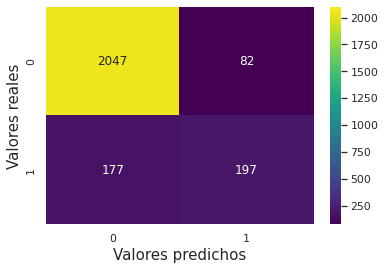

In [ ]:
cm = metrics.confusion_matrix(y_test, y_test_1)
colour = sns.color_palette("viridis", as_cmap=True)

cm = sns.heatmap(cm,annot=True,fmt="d", vmin = 75, vmax=2100, cmap = colour)
cm.set_xlabel('Valores predichos', fontsize=15)
cm.set_ylabel('Valores reales', fontsize=15)

In [ ]:
#puntuaciones
precision = tp/(tp+fp)

sensibilidad = tp/(tp+fn)

exactitud = (tp+tn)/(tp+fp+tn+fn)

puntuación_F1 =  metrics.f1_score(y_test,y_test_1)

AUROC = round(AUROC, 4)

Gini = round(AUROC * 2 - 1, 4)

puntuaciones = pd.DataFrame([Gini, AUROC, exactitud, precision, sensibilidad, puntuación_F1], columns = ['Puntuaciones'])
puntuaciones.index = ['Gini', 'AUROC', 'Exactitud', 'Precisión', 'Sensibilidad', 'Puntuación F1']
puntuaciones.head(10).style.format(precision=3).set_table_styles(style)


,Puntuaciones
Gini,0.852
AUROC,0.926
Exactitud,0.897
Precisión,0.706
Sensibilidad,0.527
Puntuación F1,0.603


In [ ]:
#Para descargar el modelo

from joblib import dump
#dump(log_reg, 'GFDC_log_reg_0.joblib')

In [ ]:
data_test_def = data_test_def.reset_index(drop=True)

#6.**PREDICCIÓN DE DATOS INTRODUCIDOS POR EL USUARIO**: RESULTADOS

###DATOS INTRODUCIDOS POR EL USUARIO

In [ ]:
if input_p != '1':
  predic = pd.DataFrame(['No se han introducido datos, se ha seleccionado no hacer ninguna predicción'], columns = ['-'])
  predic.index = ['Datos introducidos por usuario']
predic.head(10).style.set_table_styles(style)

,-
Datos introducidos por usuario,"No se han introducido datos, se ha seleccionado no hacer ninguna predicción"


###RESULTADOS

In [ ]:

predic_location = len(y_test_1_prob)
predic_prob = y_test_1_prob[predic_location-1]
predic_clas = y_test_1[predic_location-1]

output_p = pd.DataFrame([predic_prob, str(predic_clas)]).transpose()
output_p.columns = ['Probabilidad de impago', 'Clasificación']
output_p.index = ['Resultados']


if input_p != '1':
  output_p = pd.DataFrame(['No se han introducido datos, se ha seleccionado no hacer ninguna predicción'], columns = ['-'])

output_p.head(10).style.set_table_styles(style)

,-
0,"No se han introducido datos, se ha seleccionado no hacer ninguna predicción"


#7. ANÁLISIS Y CONCLUSIONES

##7.0 FUNCIONES PARA EL ANÁLISIS

###7.0.1 FUNCIÓN ANÁLISIS DE HIPÓTESIS

In [ ]:
#Calculamos el valor p para ver si la diferencia entre la población de defaults y la de no defaults son esatdísticamente significativas.
def sign_dif(defaults, not_defaults):

  count_defs = defaults['count'][0]
  count_not_defs = not_defaults['count'][0]

  mean_defs = defaults['mean'][0]
  mean_not_defs = not_defaults['mean'][0]

  std_defs = defaults['std'][0]
  std_not_defs = not_defaults['std'][0]


  z = (mean_not_defs - mean_defs)/(np.sqrt((std_not_defs * std_not_defs)/(count_not_defs) +  (std_defs * std_defs)/(count_defs)))
  pvalor = sp.stats.norm.sf(abs(z))


  return print("pvalor_aproximado:",round(pvalor, 5),"//", "pvalor:", pvalor)


##7.0.2 FUNCIÓN DE PORCENTAJES DE CLASES DE VARIABLES

In [ ]:
def percentage(variable, class1, class2, class3, class4):



  if class1.empty == False:
    class1_def = class1[class1['target_var']==1]
    class1_ndef = class1[class1['target_var']==0]
    #return print(class1_def)

    #class1_def = class1_def[variable]
    #class1_ndef = class1_ndef[variable]

  if class2.empty == False:
    class2_def = class2[class2['target_var']==1]
    class2_ndef = class2[class2['target_var']==0]

    #class1_def = class1_def[variable]
    #class1_ndef = class1_ndef[variable]

  if class3.empty == False:
    class3_def = class3[class3['target_var']==1]
    class3_ndef = class3[class3['target_var']==0]

    #class1_def = class1_def[variable]
    #class1_ndef = class1_ndef[variable]

  if class4.empty == False:
    class4_def = class4[class4['target_var']==1]
    class4_ndef = class4[class4['target_var']==0]

    #class1_def = class1_def[variable]
    #class1_ndef = class1_ndef[variable]


#-
  if class1.empty == False:
    class1_def_count = class1_def.value_counts()[0]
    class1_ndef_count = class1_ndef.value_counts()[0]
  else:
    class1_def_count = 0
    class1_ndef_count = 0

  if class2.empty == False:
    class2_def_count = class2_def.value_counts()[0]
    class2_ndef_count = class2_ndef.value_counts()[0]
  else:
    class2_def_count = 0
    class2_ndef_count = 0

  if class3.empty == False:
    class3_def_count = class3_def.value_counts()[0]
    class3_ndef_count = class3_ndef.value_counts()[0]
  else:
    class3_def_count = 0
    class3_ndef_count = 0

  if class4.empty == False:
    class4_def_count = class4_def.value_counts()[0]
    class4_ndef_count = class4_ndef.value_counts()[0]
  else:
    class4_def_count = 0
    class4_ndef_count = 0

  class1_total_count = class1_def_count + class1_ndef_count
  class2_total_count = class2_def_count + class2_ndef_count
  class3_total_count = class3_def_count + class3_ndef_count
  class4_total_count = class4_def_count + class4_ndef_count

  total_def_count = class1_def_count + class2_def_count + class3_def_count + class4_def_count
  total_ndef_count = class1_ndef_count + class2_ndef_count + class3_ndef_count + class4_ndef_count
  total_total_count = class1_total_count + class2_total_count + class3_total_count + class4_total_count


  if class1.empty == False:
    percentage_def_1 = class1_def_count/(total_def_count)*100
    percentage_ndef_1 = class1_ndef_count/(total_ndef_count)*100
    percentage_total_1 = class1_total_count/(total_ndef_count+ total_def_count)*100

  if class2.empty == False:
    percentage_def_2 = class2_def_count/(total_def_count)*100
    percentage_ndef_2 = class2_ndef_count/(total_ndef_count)*100
    percentage_total_2 = class2_total_count/(total_ndef_count+ total_def_count)*100

  if class3.empty == False:
    percentage_def_3 = class3_def_count/(total_def_count)*100
    percentage_ndef_3 = class3_ndef_count/(total_ndef_count)*100
    percentage_total_3 = class3_total_count/(total_ndef_count+ total_def_count)*100


  if class4.empty == False:
    percentage_def_4 = class4_def_count/(total_def_count)*100
    percentage_ndef_4 = class4_ndef_count/(total_ndef_count)*100
    percentage_total_4 = class4_total_count/(total_ndef_count+ total_def_count)*100


  if class1.empty == True:
    percentage_def_1 = np.nan
    percentage_ndef_1 = np.nan
    percentage_total_1 = np.nan

  if class2.empty == True:
    percentage_def_2 = np.nan
    percentage_ndef_2 = np.nan
    percentage_total_2 = np.nan

  if class3.empty == True:
    percentage_def_3 = np.nan
    percentage_ndef_3 = np.nan
    percentage_total_3 = np.nan

  if class4.empty == True:
    percentage_def_4 = np.nan
    percentage_ndef_4 = np.nan
    percentage_total_4 = np.nan



  return print("DEFAULTS - porcentajes de ",class1.index.name,":", round(percentage_def_1, 1),"%", " // ",
               "de ",class2.index.name,":", round(percentage_def_2, 1),"%", " // ",
               "de ",class3.index.name,":", round(percentage_def_3, 1),"%"," // ",
               "de ",class4.index.name,":", round(percentage_def_4, 1),"%"," // ",
               "\nNO DEFAULTS - porcentajes de ",class1.index.name,":", round(percentage_ndef_1, 1),"%"," // ",
               "de ",class2.index.name,":", round(percentage_ndef_2),"%"," // ",
               "de ",class3.index.name,":", round(percentage_ndef_3, 1),"%"," // ",
               "de ",class4.index.name,":", round(percentage_ndef_4, 1),"%"," // ",
               "\nTOTAL - porcentajes de ",class1.index.name,":", round(percentage_total_1, 1),"%"," // ",
               "de ",class2.index.name,":", round(percentage_total_2),"%"," // ",
               "de ",class3.index.name,":", round(percentage_total_3, 1),"%"," // ",
               "de ",class4.index.name,":", round(percentage_total_4, 1),"%"
               )


##7.0 PRIMER VISTAZO

In [ ]:
data_analysis = pd.concat([data_train_def, data_test_def], axis = 0)
data_analysis.describe()

,income,loan_amount,term_length,install_to_inc,schufa,target_var,customer,incomesqrt,incomeboxcox,loan_amountsqrt,loan_amountboxcox,term_lengthsqrt,term_lengthboxcox,install_to_inclog,install_to_incboxcox,schufaboxcox,schufalog
count,8382.000000,8382.000000,8382.000000,8382.000000,8382.000000,8382.000000,8382.0,8382.000000,8382.000000,8382.000000,8382.000000,8382.000000,8382.000000,8382.000000,8382.000000,8382.000000,8382.000000
mean,27236.863932,20523.962658,65.207456,0.020908,8800.975197,0.153543,1.0,160.309945,345.338633,140.733766,1182.886294,7.837640,14.265086,-4.284178,-5.876886,0.970808,9.058027
std,12627.145673,7451.741917,30.546515,0.024447,2030.408968,0.360532,0.0,39.214398,103.377632,26.796558,401.173118,1.944045,4.238372,0.879149,1.555193,0.033389,0.218166
min,5021.691061,5100.000000,12.000000,0.000729,6000.156943,0.000000,1.0,70.863891,119.034832,71.414284,333.079011,3.464102,4.931610,-7.223695,-11.795925,0.919618,8.699541
25%,17627.947804,15100.000000,41.000000,0.007369,7241.877435,0.000000,1.0,132.770282,267.121647,122.882057,853.476171,6.403124,11.152375,-4.910454,-6.943591,0.919652,8.887636
50%,26157.884298,20300.000000,63.000000,0.012833,8393.749374,0.000000,1.0,161.733992,340.848498,142.478068,1162.382667,7.937254,14.266405,-4.355771,-5.906302,0.992579,9.035243
75%,35385.686494,25500.000000,86.000000,0.024595,9872.697520,0.000000,1.0,188.110836,420.607084,159.687194,1491.900383,9.273618,17.280365,-3.705208,-4.804006,0.992602,9.197528
max,81215.721992,50300.000000,214.000000,0.394223,14843.617741,1.000000,1.0,284.983722,696.130870,224.276615,2554.443775,14.628739,28.805134,-0.930840,-0.999582,0.992641,9.605325


##7.1 PUNTUACIÓN DE LAS VARIABLES

---



Para determinar el grado de correlación entre la variable de salida y las variables de entrada, se han hecho dos tests: el test ANOVA y la prueba chi-cuadrado.

Las variables con una mayor puntuación son aquellas que más condicionan la variable objetivo.

###7.1.1 VARIABLES NUMÉRICAS

La variable que mejor puntuación ha obtenido es la puntuación schufa ('schufa'), en su transformación 'boxcox'; luego la variable ingresos  ('income'), en su transformación 'sqrt' ; después install_to_inc, en su transformación 'boxcox'; después term_length, sin transformar; y por úktimo loan_amount,  en su transformación 'boxcox'.

La puntuación se ha sacado utilizando la 'puntuación f', que ha su vez de ha conseguido del test ANOVA.

In [ ]:
score_num

,Variables,Puntuación
0,schufaboxcox,866.262122
1,schufalog,789.660848
2,incomesqrt,741.191778
3,incomeboxcox,739.294375
4,schufa,689.431988
5,income,678.909448
6,install_to_incboxcox,478.912467
7,install_to_inclog,477.198921
8,term_length,341.272549
9,term_lengthboxcox,298.335266


###7.1.2 VARIABLES CATEGÓRICAS

Las transformaciones de las variables categóricas no dieron buen resultado, y no sirvieron para darle mayor capacidad discriminatoria al proyecto, sino lo contrario. La variable categórica que ha recibido una mayor puntuacion es 'occup' después 'marital', y por último 'num_applic'

In [ ]:
score_cat

,Variables,Puntuación
0,occup,607.812150
1,occup_agg,228.106384
2,marital,130.840206
3,marital_agg,73.285611
4,num_applic,13.504910
5,num_applic_agg,7.290697


##7.2 ANÁLISIS DE LAS VARIABLES NUMÉRICAS

Previamente se ha utilizado el estadístico f para seleccionar la mejor versión de cada variable. De la misma función (SelectKBest), sacaremos el valor p para comprobar si, dependiendo de la variable objetivo, las caracteríticas generales de las variables numéricas (en concreto, la media) son diferentes.

In [ ]:
data_analysis = pd.concat([data_train_def, data_test_def], axis = 0)

In [ ]:
num_columns = ['income',	'loan_amount',	'term_length',	'install_to_inc',	'schufa']
data_analysis_num = data_analysis[['income',	'loan_amount',	'term_length',	'install_to_inc',	'schufa']]
data_analysis_targetvar = data_analysis['target_var']

In [ ]:
#columns = x_train_num.columns

In [ ]:
#from sklearn.feature_selection import f_classif
#score = f_classif(x_train_num, y_train)

In [ ]:
#score = pd.DataFrame(score)
#score.columns = columns
#score

In [ ]:
pvalues = SelectKBest(score_func=f_classif, k='all').fit(data_analysis_num, data_analysis_targetvar).pvalues_
pvalues = pd.DataFrame(pvalues, columns = ['valor p']).transpose()
pvalues.columns = num_columns
pvalues

,income,loan_amount,term_length,install_to_inc,schufa
valor p,2.325611e-206,5.519724e-24,1.111991e-98,3.749756e-76,6.588790e-203


In [ ]:
pvalues.head(10).style.format(precision = 3).set_table_styles(style)

,income,loan_amount,term_length,install_to_inc,schufa
valor p,0.000,0.000,0.000,0.000,0.000


##7.3 ANÁLISIS PD POR CLASES. / PORCENTAJES DE CADA CLASE.

In [ ]:
#data_analysis_cat = data_analysis[["occup_agg", "num_applic_agg", "marital", "customer"]]

###7.3.1 OCUPACIÓN

In [ ]:
data_analysis_occup = data_analysis.groupby(by = 'occup_agg').sum()
data_analysis_occup['PD'] = data_analysis_occup['target_var'] / data_analysis_occup['customer']
data_analysis_occup = pd.DataFrame(data_analysis_occup['PD'], columns = ["PD"])
data_analysis_occup.sort_values(by='PD').head(10).style.set_table_styles(style)

,PD
occup_agg,
Employee,0.021561
Student,0.142339
Unemployed,0.239305


In [ ]:
#Asignamos un dataframe a cada clase
student = data_analysis[data_analysis['occup_agg'] == 'Student']
employed = data_analysis[data_analysis['occup_agg'] == 'Employee']
unemployed = data_analysis[data_analysis['occup_agg'] == 'Unemployed']

student_ptg = student[["occup_agg", 'target_var']]
employed_ptg = employed[["occup_agg", 'target_var']]
unemployed_ptg = unemployed[["occup_agg", 'target_var']]

#Asignamos a cada dataframe un nombre (Para el output de la función)
employed_ptg.index.name = "employed"
student_ptg.index.name = "student"
unemployed_ptg.index.name = "unemployed"

none = pd.DataFrame([])
none.index.name = "none"
percentage('occup_agg', student_ptg, employed_ptg, unemployed_ptg, none)

DEFAULTS - porcentajes de  student : 24.4 %  //  de  employed : 3.9 %  //  de  unemployed : 71.7 %  //  de  none : nan %  //  
NO DEFAULTS - porcentajes de  student : 26.7 %  //  de  employed : 32 %  //  de  unemployed : 41.4 %  //  de  none : nan %  //  
TOTAL - porcentajes de  student : 26.3 %  //  de  employed : 28 %  //  de  unemployed : 46.0 %  //  de  none : nan %


###7.3.2 ESTADO CIVIL

In [ ]:
data_analysis_marital = data_analysis.groupby(by = 'marital_agg').sum()
data_analysis_marital['PD'] = data_analysis_marital['target_var'] / data_analysis_marital['customer']
data_analysis_marital = pd.DataFrame(data_analysis_marital['PD'], columns = ["PD"])
data_analysis_marital.sort_values(by='PD').head(10).style.set_table_styles(style)

,PD
marital_agg,
Married,0.025087
Living together,0.105727
Single,0.170653
Divorced_sep,0.212236


In [ ]:
#Asignamos un dataframe a cada clase
single = data_analysis[data_analysis['marital_agg'] == 'Single']
divorced_sep = data_analysis[data_analysis['marital_agg'] == 'Divorced_sep']
married = data_analysis[data_analysis['marital_agg'] == 'Married']
living_together = data_analysis[data_analysis['marital_agg'] == 'Living together']

single_ptg = single[["marital_agg", 'target_var']]
divorced_sep_ptg = divorced_sep[["marital_agg", 'target_var']]
married_ptg = married[["marital_agg", 'target_var']]
living_together_ptg = living_together[["marital_agg", 'target_var']]

#Asignamos a cada dataframe un nombre (Para el output de la función)
single_ptg.index.name = "single"
divorced_sep_ptg.index.name = "divorced_sep"
married_ptg.index.name = "married"
living_together_ptg.index.name = "living_together"

none = pd.DataFrame([])
none.index.name = "none"
percentage('marital_agg', single_ptg, divorced_sep_ptg, married_ptg, living_together_ptg)

DEFAULTS - porcentajes de  single : 49.3 %  //  de  divorced_sep : 39.1 %  //  de  married : 2.3 %  //  de  living_together : 9.3 %  //  
NO DEFAULTS - porcentajes de  single : 43.5 %  //  de  divorced_sep : 26 %  //  de  married : 15.9 %  //  de  living_together : 14.3 %  //  
TOTAL - porcentajes de  single : 44.4 %  //  de  divorced_sep : 28 %  //  de  married : 13.8 %  //  de  living_together : 13.5 %


###7.3.3 NÚMERO DE SOLICITANTES

In [ ]:
data_analysis_napplic = data_analysis.groupby(by = 'num_applic_agg').sum()
data_analysis_napplic['PD'] = data_analysis_napplic['target_var'] / data_analysis_napplic['customer']
data_analysis_napplic = pd.DataFrame(data_analysis_napplic['PD'], columns = ["PD"])
data_analysis_napplic.sort_values(by='PD').head(10).style.set_table_styles(style)

,PD
num_applic_agg,
2,0.122318
1,0.169173


In [ ]:
#Asignamos un dataframe a cada clase
one_applic = data_analysis[data_analysis['num_applic_agg'] == '1']
two_applic = data_analysis[data_analysis['num_applic_agg'] == '2']

one_a_ptg = one_applic[["num_applic_agg", 'target_var']]
two_a_ptg = two_applic[["num_applic_agg", 'target_var']]

#Asignamos a cada dataframe un nombre (Para el output de la función)
one_a_ptg.index.name = "1"
two_a_ptg.index.name = "2"


none = pd.DataFrame([])
none.index.name = "none"
percentage('num_applic_agg', one_a_ptg, two_a_ptg, none, none)

DEFAULTS - porcentajes de  1 : 73.4 %  //  de  2 : 26.6 %  //  de  none : nan %  //  de  none : nan %  //  
NO DEFAULTS - porcentajes de  1 : 65.4 %  //  de  2 : 35 %  //  de  none : nan %  //  de  none : nan %  //  
TOTAL - porcentajes de  1 : 66.6 %  //  de  2 : 33 %  //  de  none : nan %  //  de  none : nan %


##7.4 TIPOS DE PRÉSTAMOS

###7.4.1 CANTIDAD PRESTADA

In [ ]:
data_analysis_loanam = pd.DataFrame(data_analysis['loan_amount'].describe())
data_analysis_loanam.columns = ['cantidad prestada']
data_analysis_loanam.head(10).style.set_table_styles(style)

,cantidad prestada
count,8382.000000
mean,20523.962658
std,7451.741917
min,5100.000000
25%,15100.000000
50%,20300.000000
75%,25500.000000
max,50300.000000


##7.5 TIPOS DE CLIENTES

###7.5.1 INGRESOS

In [ ]:
data_analysis_income = pd.DataFrame(data_analysis['income'].describe())
data_analysis_income.columns = ['ingresos']
data_analysis_income.head(10).style.set_table_styles(style)

,ingresos
count,8382.000000
mean,27236.863932
std,12627.145673
min,5021.691061
25%,17627.947804
50%,26157.884298
75%,35385.686494
max,81215.721992


MIN-MAX: (5021.69106088527, 81215.72199150338)
IQR: 17757.73868961543
SQEW: 0.5011604433377356
KURT: -0.07918539072768382
OUTLIERS -9008.660229972807 / 62022.294528488914
EXTREME_OUTLIERS -35645.268264395956 / 88658.90256291206


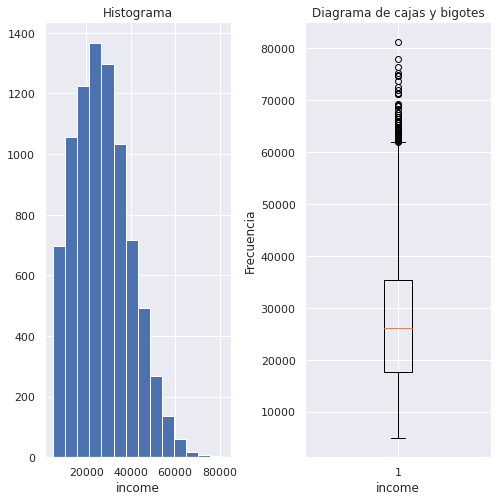

In [ ]:
exp_var_num(data_num_transform,'income',sturges_value)

###7.5.1.1 INGRESOS POR FECHAS

In [ ]:
data_analysis_incomedate = data_analysis.groupby(by = 'date3').sum().copy()
data_analysis_incomedate['mean_salary'] = data_analysis_incomedate['income'] /data_analysis_incomedate['customer']
data_analysis_incomedate = pd.DataFrame(data_analysis_incomedate['mean_salary'])

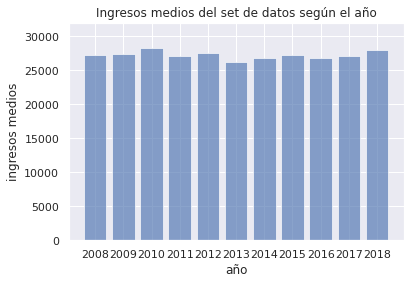

In [ ]:
a = np.arange(len(data_analysis_incomedate['mean_salary'].to_list()))
plt.bar( a, data_analysis_incomedate['mean_salary'].to_list(), align = 'center', alpha=0.65)
#plt.xticks([2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018])
plt.xticks(ticks = np.arange(0,11), labels = [2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018])
plt.ylabel('ingresos medios')
plt.xlabel('año')
plt.title('Ingresos medios del set de datos según el año')
plt.ylim([0, 32000])
plt.show()

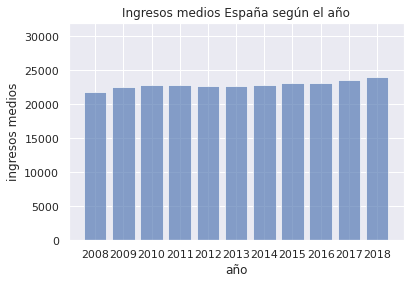

In [ ]:
spain_mean_income = [21883, 22511, 22790, 22899, 22726, 22697, 22858, 23106, 23156, 23645, 24009]
plt.bar(a, spain_mean_income, align='center', alpha=0.65)
plt.xticks(ticks = np.arange(0,11), labels = [2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018])
plt.ylabel('ingresos medios')
plt.xlabel('año')
plt.title('Ingresos medios España según el año')
plt.ylim([0, 32000])
plt.show()


In [ ]:
a = 0
for i in [21883, 22511, 22790, 22899, 22726, 22697, 22858, 23106, 23156, 23645, 24009]:
  a += i
print(a/11)

22934.545454545456


###7.5.1.2 INGRESOS POR SITUACIÓN LABORAL

In [ ]:
comp_incomes = pd.concat([data_analysis[data_analysis['occup_agg'] == 'Employee'].describe()['income'], data_analysis[data_analysis['occup_agg'] == 'Unemployed'].describe()['income'], data_analysis[data_analysis['occup_agg'] == 'Student'].describe()['income']], axis = 1)
comp_incomes.columns  = ['Empleados', 'Desempleados', 'Estudiando']
comp_incomes

,Empleados,Desempleados,Estudiando
count,2319.000000,3857.000000,2206.000000
mean,34144.710495,25713.849456,22638.029233
std,13009.454965,11515.542186,10991.623533
min,5252.219823,5021.691061,5049.371296
25%,24592.731381,16798.323744,14141.865608
50%,33691.887471,25024.424264,21445.145274
75%,43174.536051,33201.996384,29834.847437
max,81215.721992,74606.462564,68300.111327


In [ ]:
income_occup_analysis = data_analysis.copy()
income_occup_analysis = income_occup_analysis[['income', 'occup_agg']]

employed = income_occup_analysis[income_occup_analysis['occup_agg']=='Employee']
unemployed = income_occup_analysis[income_occup_analysis['occup_agg']=='Unemployed']
student = income_occup_analysis[income_occup_analysis['occup_agg']=='Student']

employed = employed.drop('occup_agg', axis = 1)
unemployed = unemployed.drop('occup_agg', axis = 1)
student = student.drop('occup_agg', axis = 1)

employed = employed.describe().transpose()
unemployed = unemployed.describe().transpose()
student = student.describe().transpose()



In [ ]:
pvalor_unemp_emp = sign_dif(unemployed, employed)

pvalor_aproximado: 0.0 // pvalor: 2.6819402972640044e-146


In [ ]:
pvalor_unemp_std = sign_dif(unemployed, student)

pvalor_aproximado: 0.0 // pvalor: 3.464455233658105e-25


In [ ]:
pvalor_emp_std = sign_dif(employed, student)

pvalor_aproximado: 0.0 // pvalor: 1.0808044965563394e-227


In [ ]:
pvalor_income_occup = pd.DataFrame([[0, 8.27e-146 ],[0, 3.95e-25 ]], columns = ['pvalor aproximado', 'pvalor']).transpose()
pvalor_income_occup.columns = ["desempleados y empleados", "desempleados y estudiantes"]
pvalor_income_occup

,desempleados y empleados,desempleados y estudiantes
pvalor aproximado,0.000000e+00,0.000000e+00
pvalor,8.270000e-146,3.950000e-25


###7.5.1.3 INGRESOS POR ESTADO CIVIL

In [ ]:
data_analysis['marital_agg'].unique()

array(['Single', 'Living together', 'Divorced_sep', 'Married'],
      dtype=object)

In [ ]:
comp_incomes = pd.concat([data_analysis[data_analysis['marital_agg'] == 'Single'].describe()['income'], data_analysis[data_analysis['marital_agg'] == 'Living together'].describe()['income'], data_analysis[data_analysis['marital_agg'] == 'Divorced_sep'].describe()['income'], data_analysis[data_analysis['marital_agg'] == 'Married'].describe()['income']], axis = 1)
comp_incomes.columns  = ['Solteros', 'Viviendo juntos', 'Divorciados y separados', 'Casados']
comp_incomes

,Solteros,Viviendo juntos,Divorciados y separados,Casados
count,3721.000000,1135.000000,2370.000000,1156.000000
mean,26719.369974,34276.792478,21694.507809,33353.351932
std,11836.097258,13179.492617,10137.596420,13205.830733
min,5064.128637,5294.504176,5021.691061,5377.932795
25%,17817.287797,24906.392026,13849.489350,23723.850598
50%,25859.242174,33792.268398,20511.382128,32592.564866
75%,34477.109241,43519.396092,28576.955636,42484.740521
max,81215.721992,74923.021444,58843.466407,77952.582315


In [ ]:
income_marital_analysis = data_analysis.copy()
income_marital_analysis = income_marital_analysis[['income', 'marital_agg']]

single = income_marital_analysis[income_marital_analysis['marital_agg']=='Single']
living_together = income_marital_analysis[income_marital_analysis['marital_agg']=='Living together']
divorced_sep = income_marital_analysis[income_marital_analysis['marital_agg']=='Divorced_sep']
married = income_marital_analysis[income_marital_analysis['marital_agg']=='Married']

single = single.drop('marital_agg', axis = 1)
living_together = living_together.drop('marital_agg', axis = 1)
divorced_sep = divorced_sep.drop('marital_agg', axis = 1)
married = married.drop('marital_agg', axis = 1)

single = single.describe().transpose()
living_together = living_together.describe().transpose()
divorced_sep = divorced_sep.describe().transpose()
married = married.describe().transpose()


In [ ]:
pvalor_unemp_emp = sign_dif(divorced_sep, single)

pvalor_aproximado: 0.0 // pvalor: 4.723485298124412e-70


In [ ]:
pvalor_unemp_emp = sign_dif(single, living_together)

pvalor_aproximado: 0.0 // pvalor: 2.0971542792216394e-67


In [ ]:
pvalor_unemp_emp = sign_dif(living_together, married)

pvalor_aproximado: 0.04696 // pvalor: 0.04695585509189839


In [ ]:
pvalor_income_occup = pd.DataFrame([[str(0), str(1.02e-70)],[str(0), str(3.16e-67)], [str(0.05), str(0.05228)]], columns = ['pvalor aproximado', 'pvalor']).transpose()
pvalor_income_occup.columns = ["devorciados_separados y solteros", "solteros y viviendo juntos", "viviendo juentos y casados"]
pvalor_income_occup

,devorciados_separados y solteros,solteros y viviendo juntos,viviendo juentos y casados
pvalor aproximado,0,0,0.05
pvalor,1.02e-70,3.16e-67,0.05228
